In [1]:
import torch
from torch import nn
from torch.nn import functional as F
import numpy as np
import matplotlib
# matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cvxpy as cp
from systems_and_functions.control_affine_system import ControlAffineSystem
from systems_and_functions.cart_pole_system import CartPole
from systems_and_functions.inverted_pendulum_system import InvertedPendulum
from systems_and_functions.networks import PolicyNet, LyapunovNet, DFunctionNet
from systems_and_functions.single_track_car_system import SingleTrackCar
from systems_and_functions.off_policy_dlearning_process import OffPolicyDlearningProcess

%matplotlib notebook 
%matplotlib inline   

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

np.random.seed(15)

torch.manual_seed(24)
if torch.cuda.is_available():
    torch.cuda.manual_seed(24)
    torch.cuda.manual_seed_all(24)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [2]:
system_params = {'psi_ref': 0.5, 'v_ref': 1, 'a_ref': 0.0, 'omega_ref': 0, 'mu_scale': 0.1}

car1 = SingleTrackCar(
    system_params = system_params,
    controller_params = None,
    dt = 0.01,
    controller_period = 0.01)

No controller is involved.


-------------------------------Main Iteration------------------------------


S-Curve: 100%|██████████| 499/499 [00:08<00:00, 60.36it/s]
d:\ICRA\DOPT\systems_and_functions\off_policy_dlearning_process.py:149: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  K = torch.tensor(-self.system.K)


-----------------Convergence Speed and Judgment-----------------
--------------It takes 0 steps to norm 2 ball;--------------
---------------It takes 110 steps to unit ball;---------------
----------------It takes 158 steps to converge.--------------
---------------------Initializing Policy------------------------
Epoch [1000/10000], Loss: 0.3757899106
Epoch [2000/10000], Loss: 0.1394489855
Epoch [3000/10000], Loss: 0.0961578712
Epoch [4000/10000], Loss: 0.0743236840
Epoch [5000/10000], Loss: 0.0603645444
Epoch [6000/10000], Loss: 0.0503306873
Epoch [7000/10000], Loss: 0.0428453870
Epoch [8000/10000], Loss: 0.0370037258
Epoch [9000/10000], Loss: 0.0322478525
Epoch [10000/10000], Loss: 0.0283477250
-------------------------Direct Update--------------------------


S-Curve: 100%|██████████| 499/499 [00:09<00:00, 49.95it/s]


-----------------Convergence Speed and Judgment-----------------
--------------It takes 0 steps to norm 2 ball;--------------
---------------It takes 110 steps to unit ball;---------------
----------------It takes 157 steps to converge.--------------


d:\ICRA\DOPT\systems_and_functions\single_track_car_system.py:678: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
d:\ICRA\DOPT\systems_and_functions\single_track_car_system.py:544: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


---------------------------------Iteration 1-------------------------------
------------------Sampling Training Data STCar------------------


sample state space: 100%|██████████| 2000/2000 [00:37<00:00, 53.52it/s]


--------------------------Learning V----------------------------
Epoch [1000/4000], Loss: 6.1059670448
Epoch [2000/4000], Loss: 2.4050228596
Epoch [3000/4000], Loss: 1.1834161282
Epoch [4000/4000], Loss: 0.7859893441


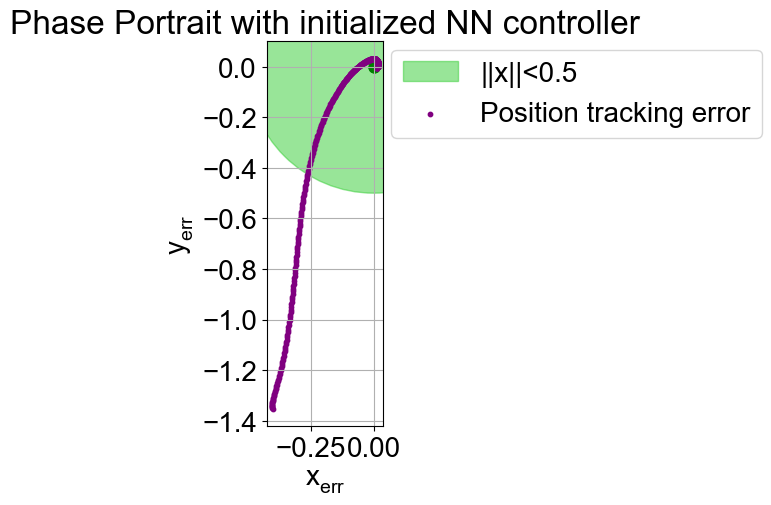

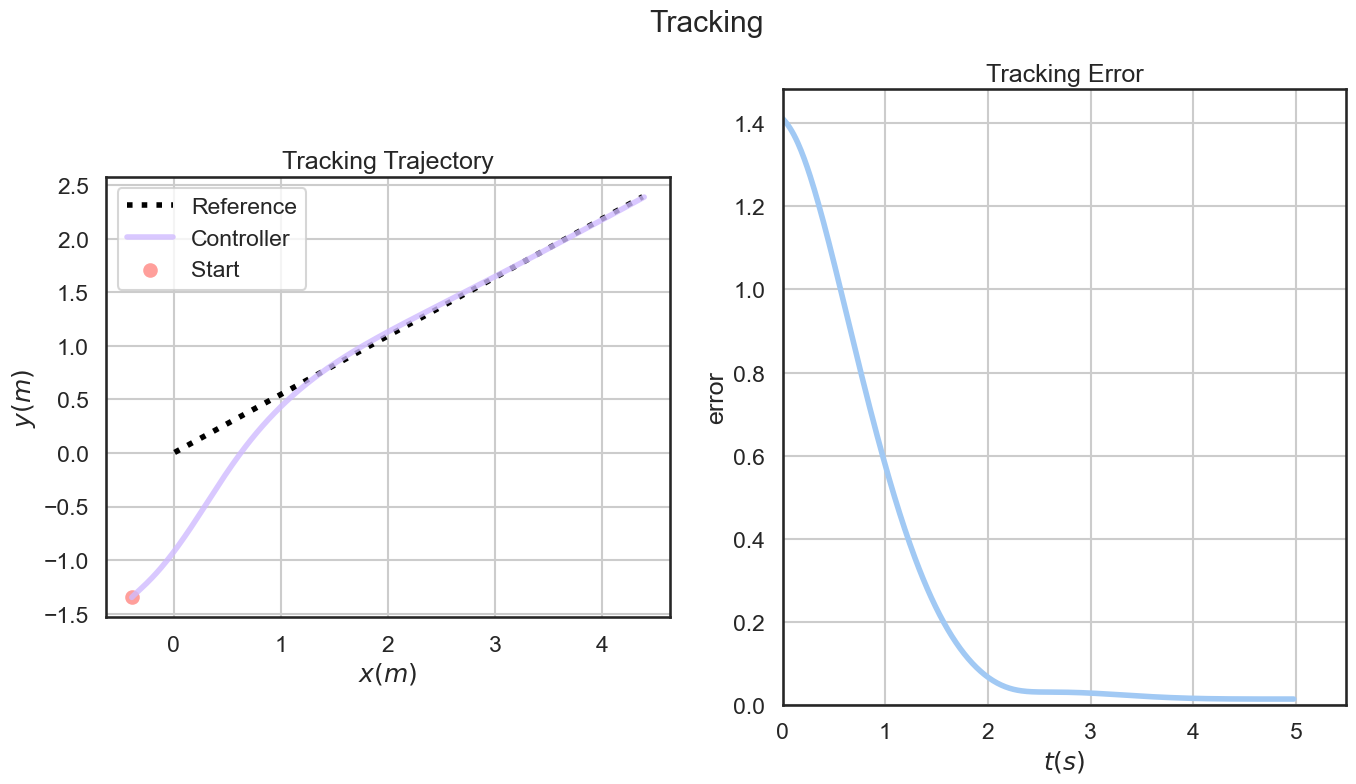

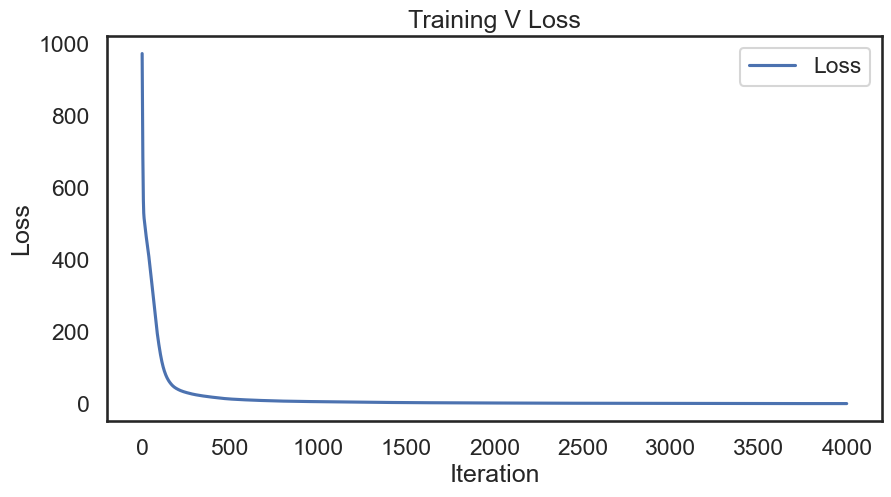

L0:tensor([0.1570], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
-----------------------Plotting Lyapunov------------------------


d:\ICRA\DOPT\systems_and_functions\off_policy_dlearning_process.py:506: UserWarning: The following kwargs were not used by contour: 'cmpa'
  contour = ax.contourf(X, Y, Z, levels=25, cmpa='RdBu', alpha = 1)


<Figure size 800x800 with 0 Axes>

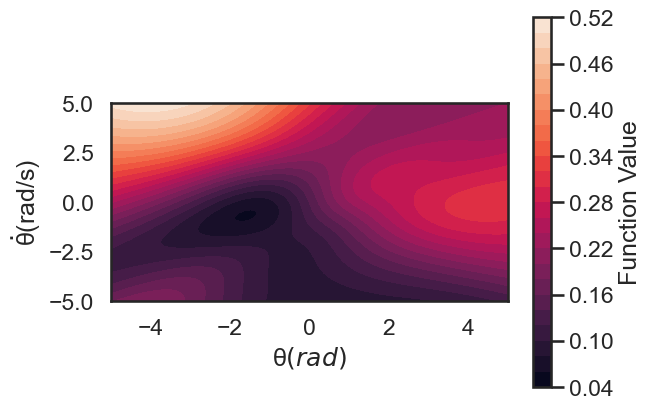

--------------------------Learning D----------------------------
Epoch [1000/5000], Loss: 1.0524163246
Epoch [2000/5000], Loss: 0.9035268426
Epoch [3000/5000], Loss: 0.8042999506
Epoch [4000/5000], Loss: 0.7322110534
Epoch [5000/5000], Loss: 0.6748542786
-----------------------Plotting Dfunction------------------------


<Figure size 800x800 with 0 Axes>

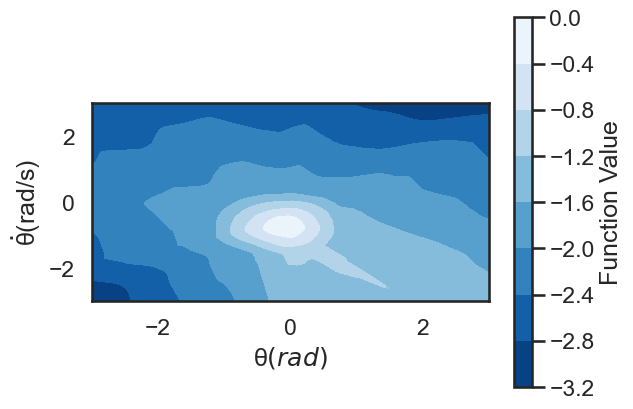

torch.sum(loss_fn(dL, DV_ext)):0.29406994581222534, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.0222], device='cuda:0', grad_fn=<SelectBackward0>)
------------------Sampling Training Data STCar------------------


sample state space: 100%|██████████| 500/500 [00:08<00:00, 56.07it/s]


------------------------Improveing Policy-----------------------


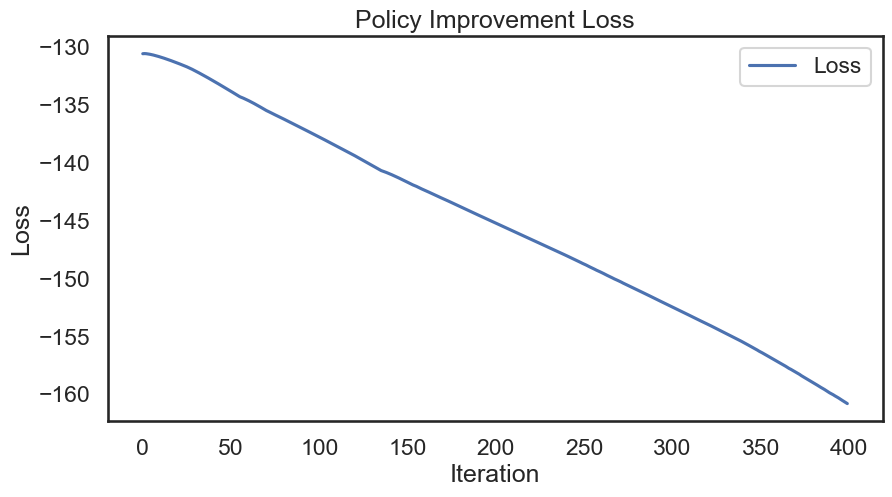

--------------------------Soft Update---------------------------


S-Curve: 100%|██████████| 499/499 [00:09<00:00, 54.02it/s]


-----------------Convergence Speed and Judgment-----------------
--------------It takes 0 steps to norm 2 ball;--------------
---------------It takes 108 steps to unit ball;---------------
----------------It takes 155 steps to converge.--------------
----------------------------------Save Data--------------------------------


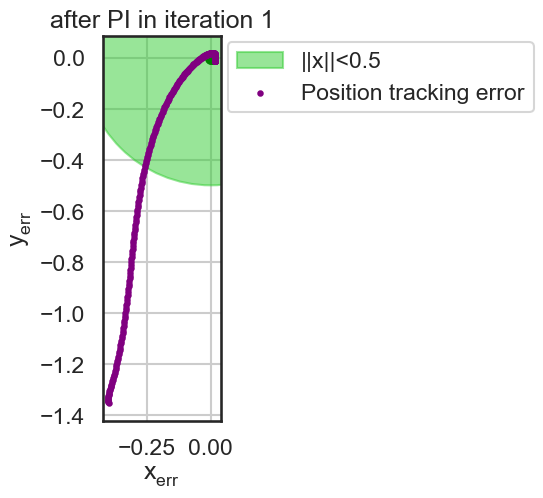

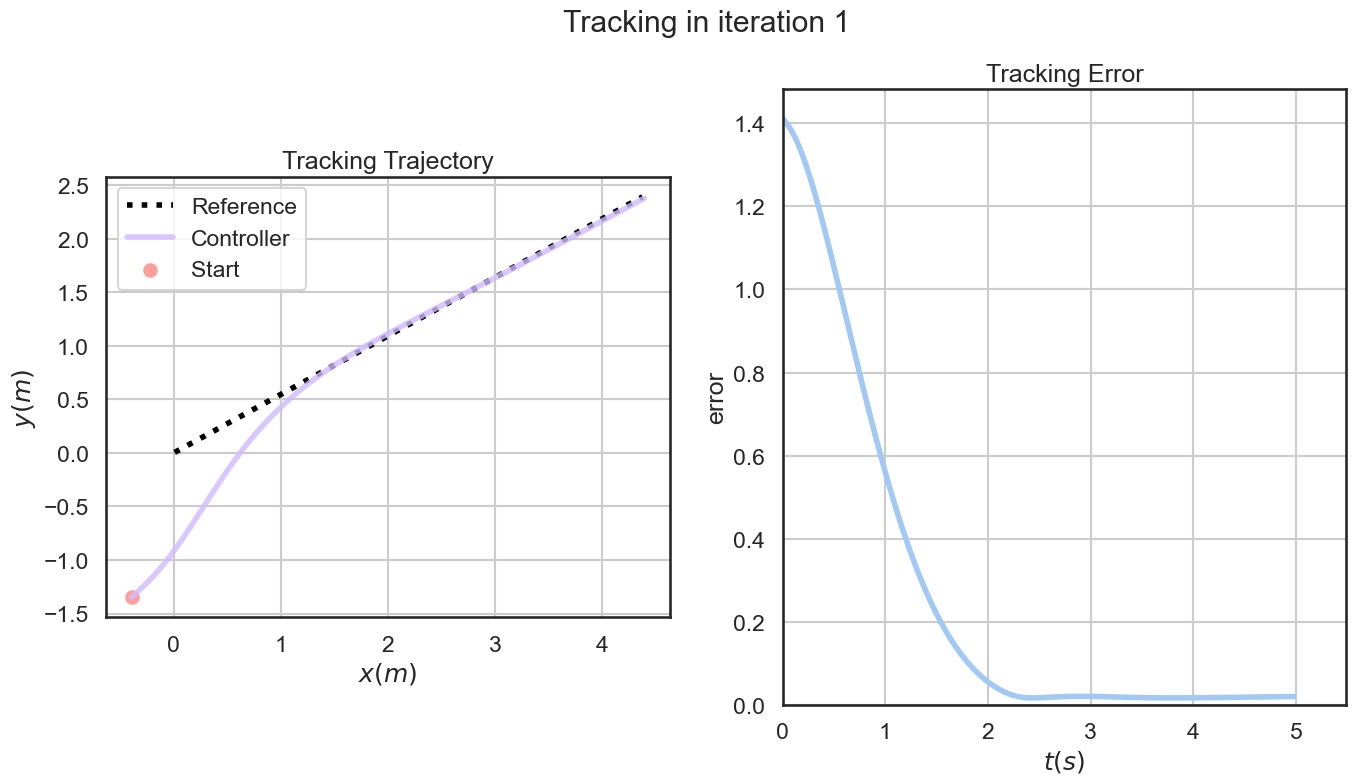

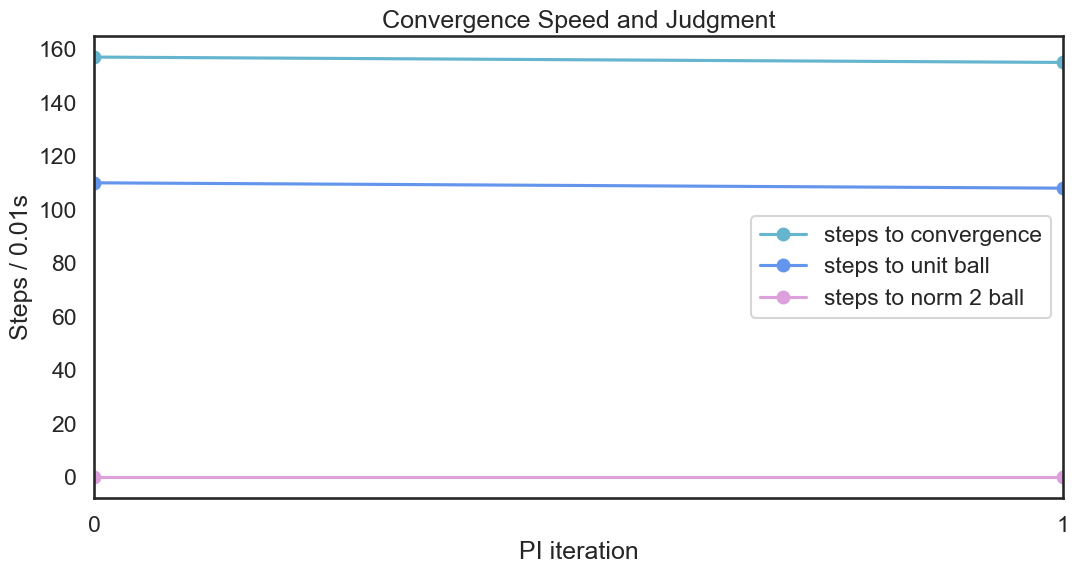

[157, 155]
[110, 108]
[0, 0]
---------------------------------Iteration 2-------------------------------
------------------Sampling Training Data STCar------------------


sample state space: 100%|██████████| 2000/2000 [00:36<00:00, 55.10it/s]


--------------------------Learning V----------------------------
Epoch [1000/4000], Loss: 1.0097242594
Epoch [2000/4000], Loss: 0.8529346585
Epoch [3000/4000], Loss: 0.7388422489
Epoch [4000/4000], Loss: 0.6262325644


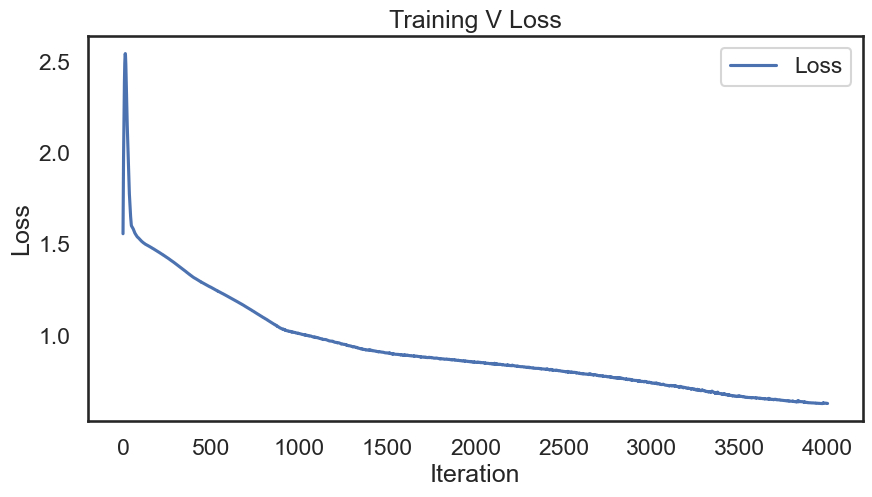

L0:tensor([0.0995], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
-----------------------Plotting Lyapunov------------------------


<Figure size 800x800 with 0 Axes>

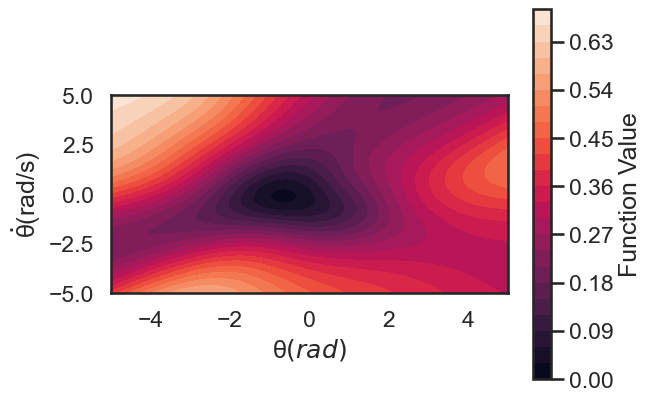

--------------------------Learning D----------------------------
Epoch [1000/5000], Loss: 0.8472247124
Epoch [2000/5000], Loss: 0.8374893665
Epoch [3000/5000], Loss: 0.8255760670
Epoch [4000/5000], Loss: 0.8134497404
Epoch [5000/5000], Loss: 0.8006939292
-----------------------Plotting Dfunction------------------------


<Figure size 800x800 with 0 Axes>

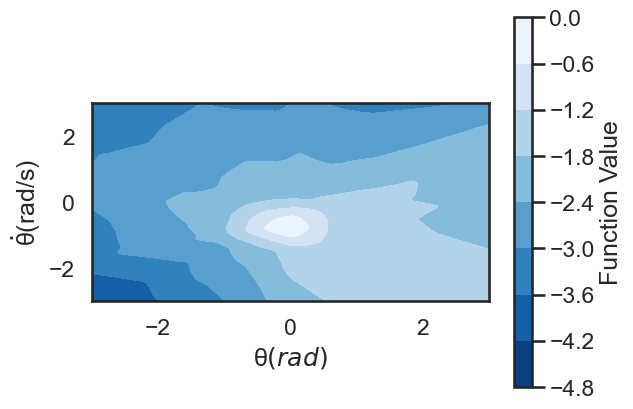

torch.sum(loss_fn(dL, DV_ext)):0.4169868528842926, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.0168], device='cuda:0', grad_fn=<SelectBackward0>)
------------------Sampling Training Data STCar------------------


sample state space: 100%|██████████| 500/500 [00:08<00:00, 58.38it/s]


------------------------Improveing Policy-----------------------


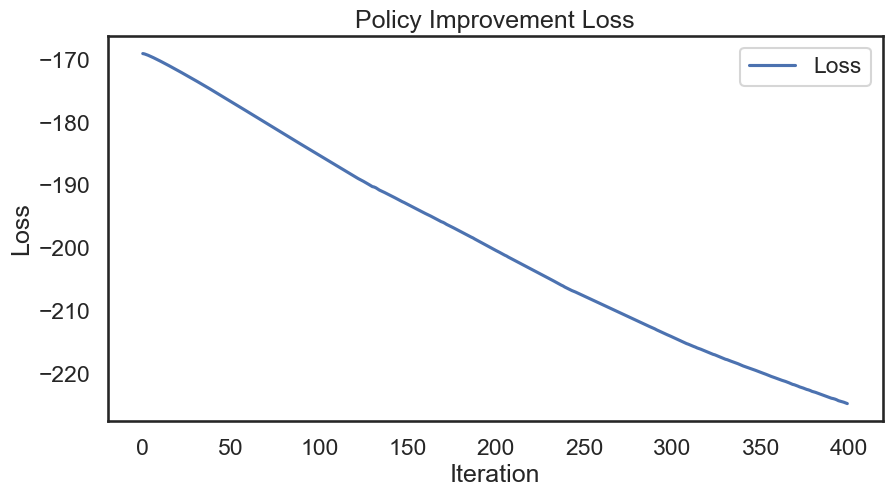

--------------------------Soft Update---------------------------


S-Curve: 100%|██████████| 499/499 [00:10<00:00, 49.23it/s]


-----------------Convergence Speed and Judgment-----------------
--------------It takes 0 steps to norm 2 ball;--------------
---------------It takes 102 steps to unit ball;---------------
----------------It takes 146 steps to converge.--------------
----------------------------------Save Data--------------------------------


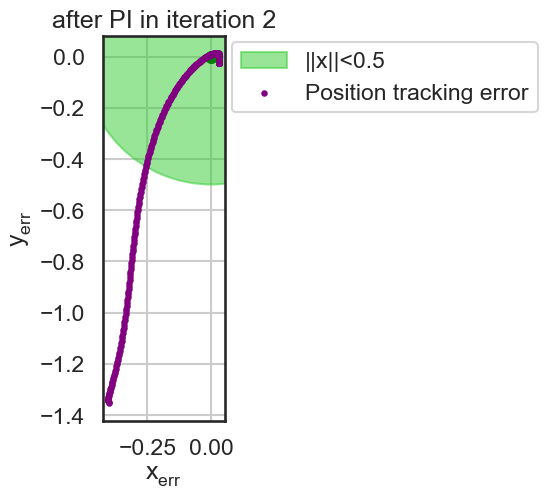

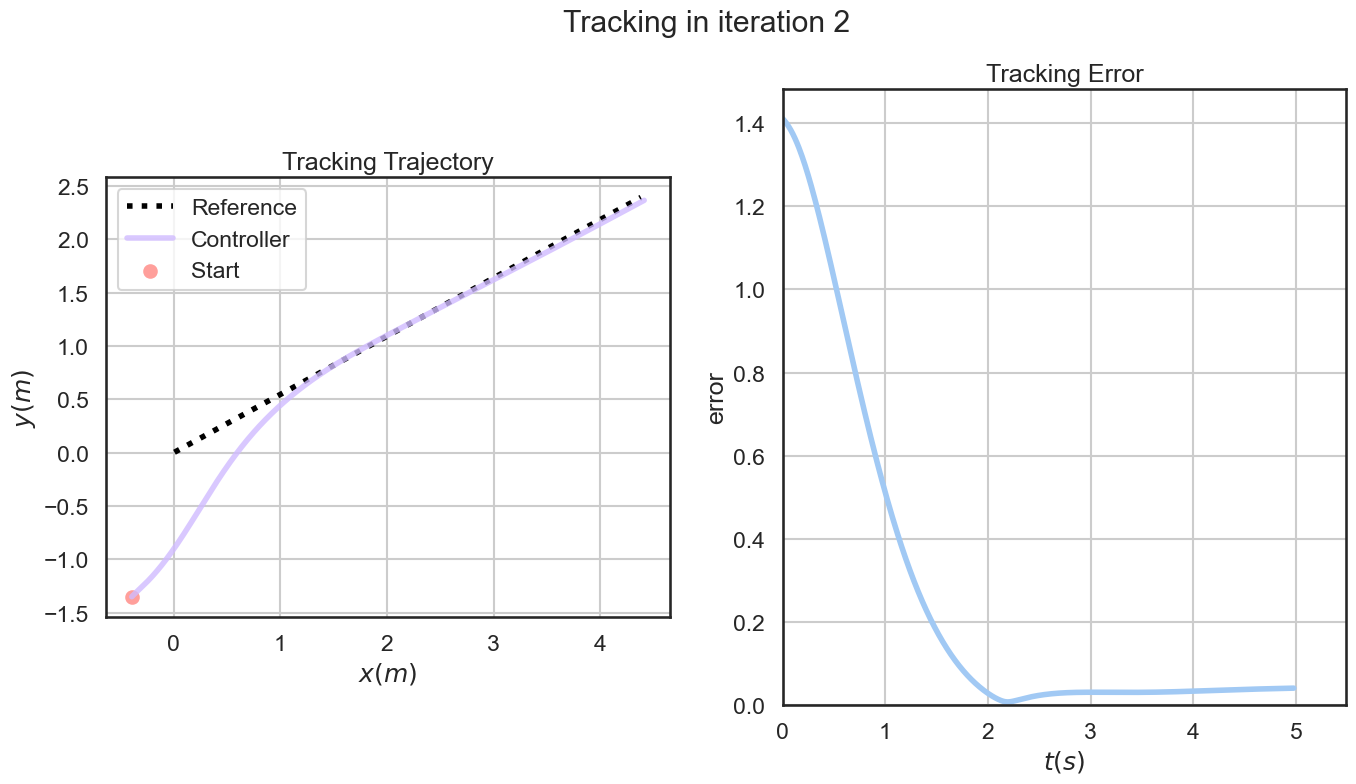

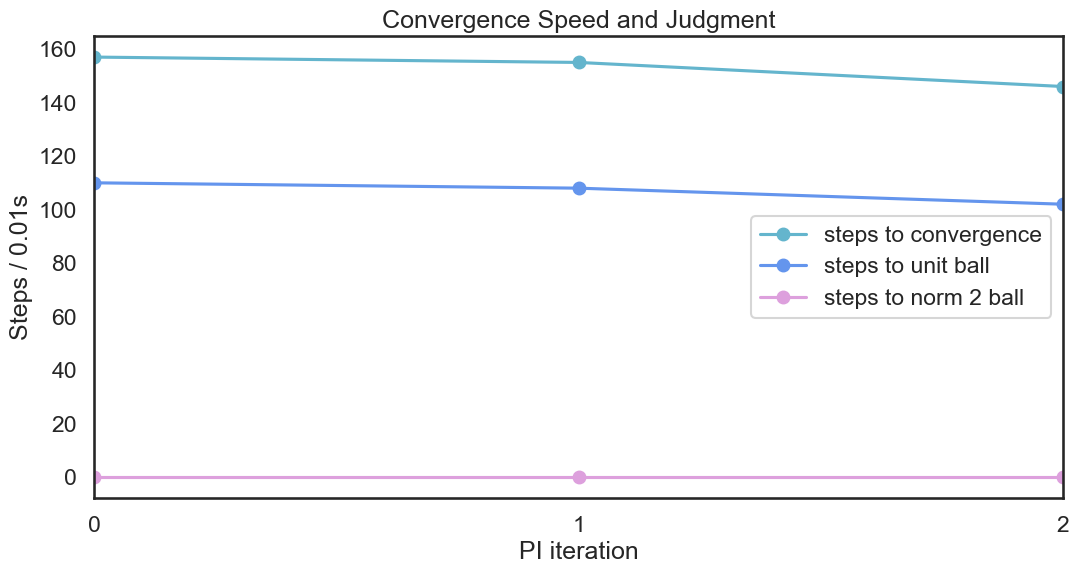

[157, 155, 146]
[110, 108, 102]
[0, 0, 0]
---------------------------------Iteration 3-------------------------------
------------------Sampling Training Data STCar------------------


sample state space: 100%|██████████| 2000/2000 [00:36<00:00, 54.97it/s]


--------------------------Learning V----------------------------
Epoch [1000/4000], Loss: 0.7128461599
Epoch [2000/4000], Loss: 0.6677036285
Epoch [3000/4000], Loss: 0.6382406354
Epoch [4000/4000], Loss: 0.5989947319


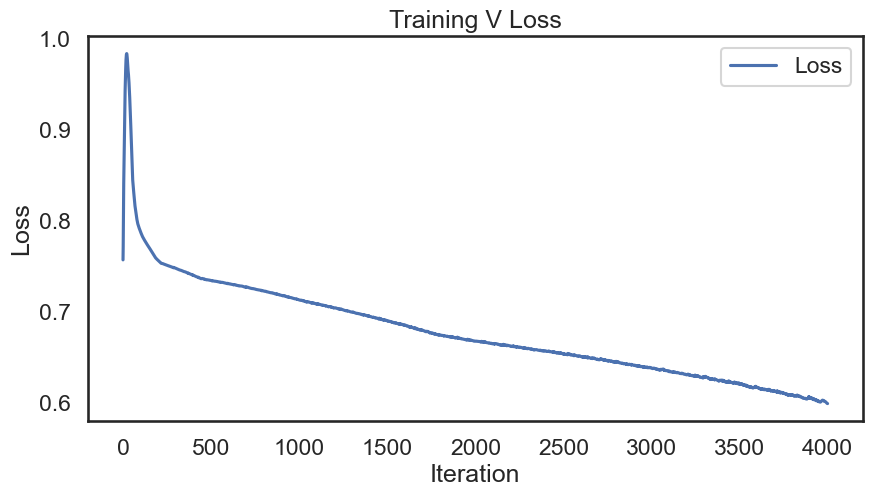

L0:tensor([0.0464], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
-----------------------Plotting Lyapunov------------------------


<Figure size 800x800 with 0 Axes>

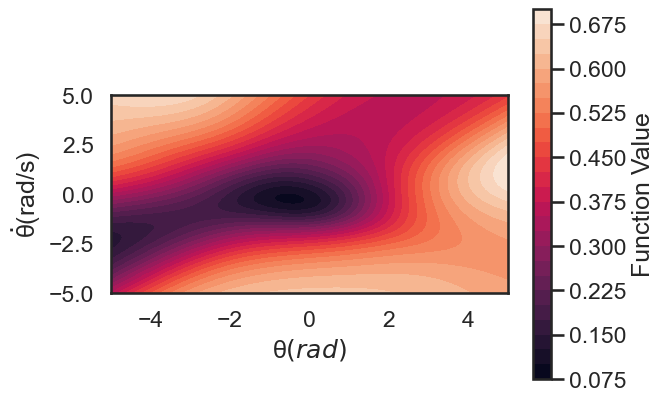

--------------------------Learning D----------------------------
Epoch [1000/5000], Loss: 0.8801136613
Epoch [2000/5000], Loss: 0.8700263500
Epoch [3000/5000], Loss: 0.8606032729
Epoch [4000/5000], Loss: 0.8486393690
Epoch [5000/5000], Loss: 0.8345521688
-----------------------Plotting Dfunction------------------------


<Figure size 800x800 with 0 Axes>

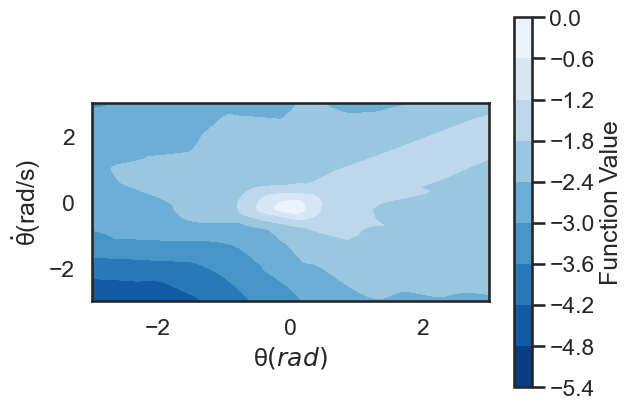

torch.sum(loss_fn(dL, DV_ext)):0.4509344696998596, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.0482], device='cuda:0', grad_fn=<SelectBackward0>)
------------------Sampling Training Data STCar------------------


sample state space: 100%|██████████| 500/500 [00:09<00:00, 53.57it/s]


------------------------Improveing Policy-----------------------


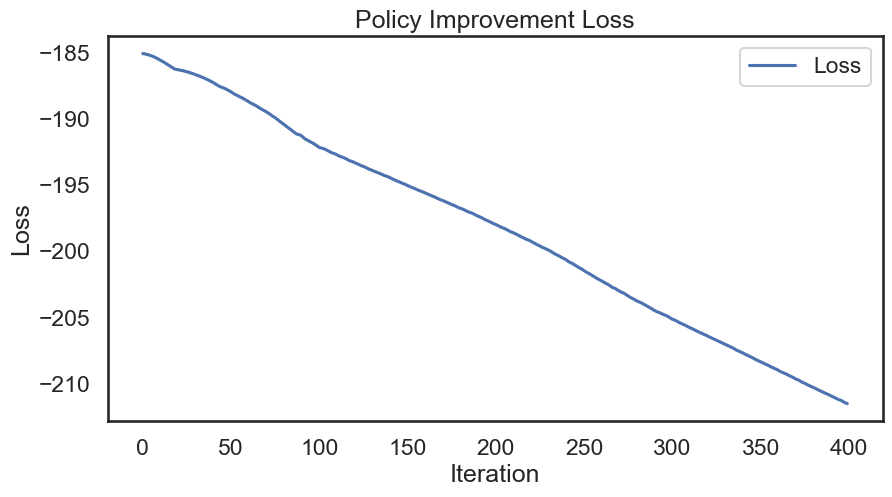

--------------------------Soft Update---------------------------


S-Curve: 100%|██████████| 499/499 [00:10<00:00, 48.52it/s]


-----------------Convergence Speed and Judgment-----------------
--------------It takes 0 steps to norm 2 ball;--------------
---------------It takes 97 steps to unit ball;---------------
----------------It takes 141 steps to converge.--------------
----------------------------------Save Data--------------------------------


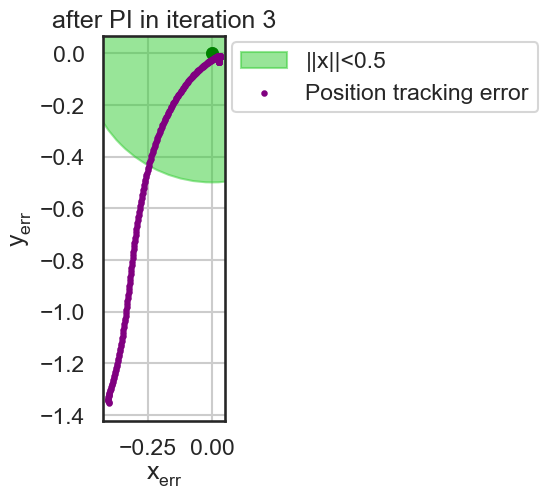

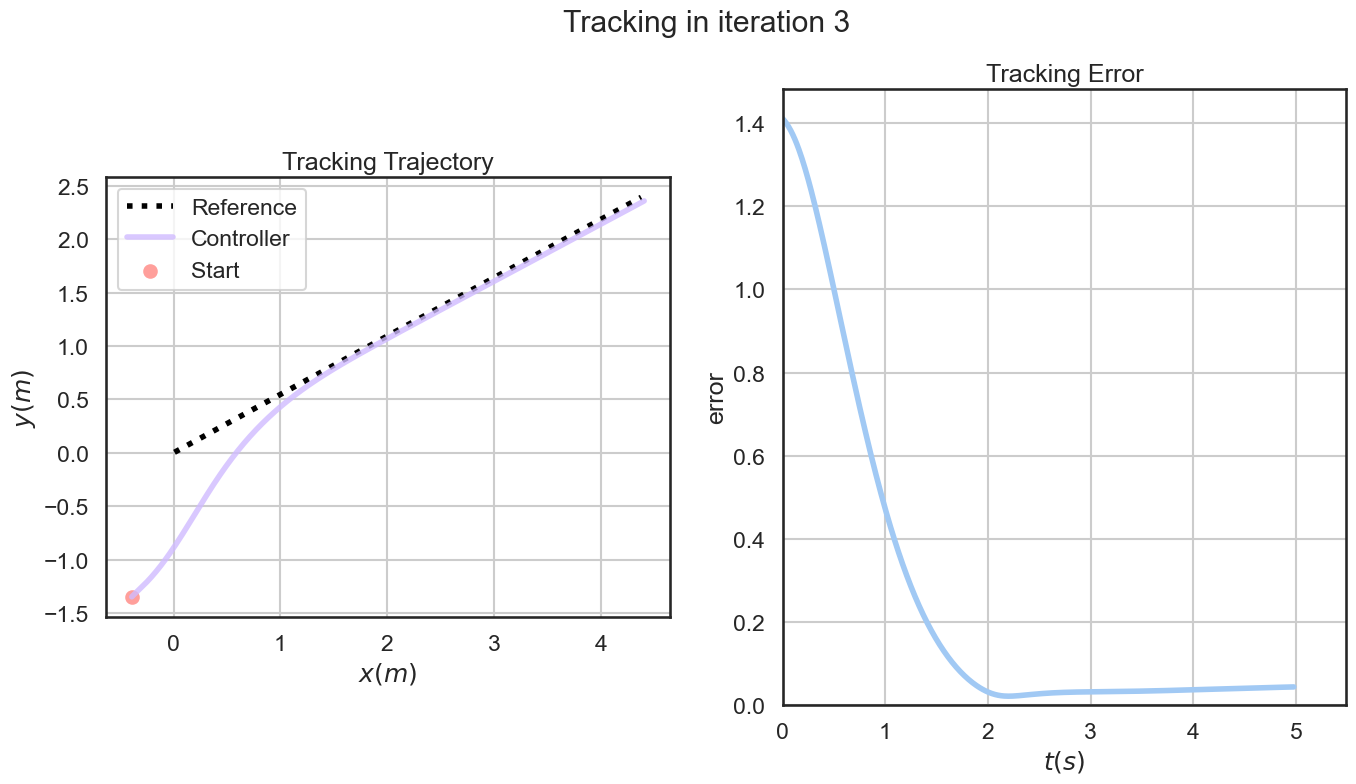

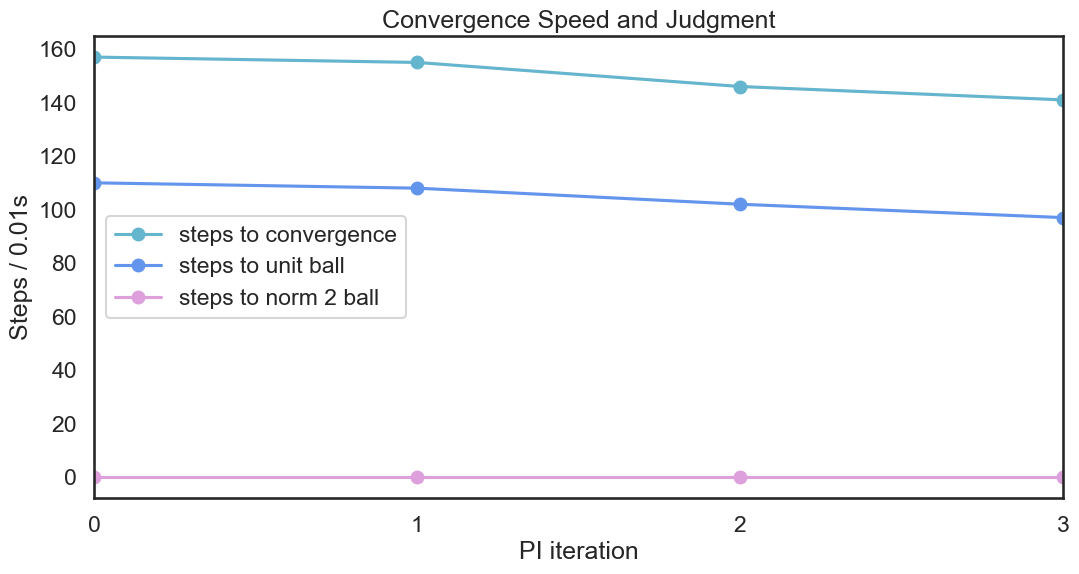

[157, 155, 146, 141]
[110, 108, 102, 97]
[0, 0, 0, 0]
---------------------------------Iteration 4-------------------------------
------------------Sampling Training Data STCar------------------


sample state space: 100%|██████████| 2000/2000 [00:37<00:00, 53.55it/s]


--------------------------Learning V----------------------------
Epoch [1000/4000], Loss: 0.6186788678
Epoch [2000/4000], Loss: 0.5976634026
Epoch [3000/4000], Loss: 0.5805993676
Epoch [4000/4000], Loss: 0.5610818267


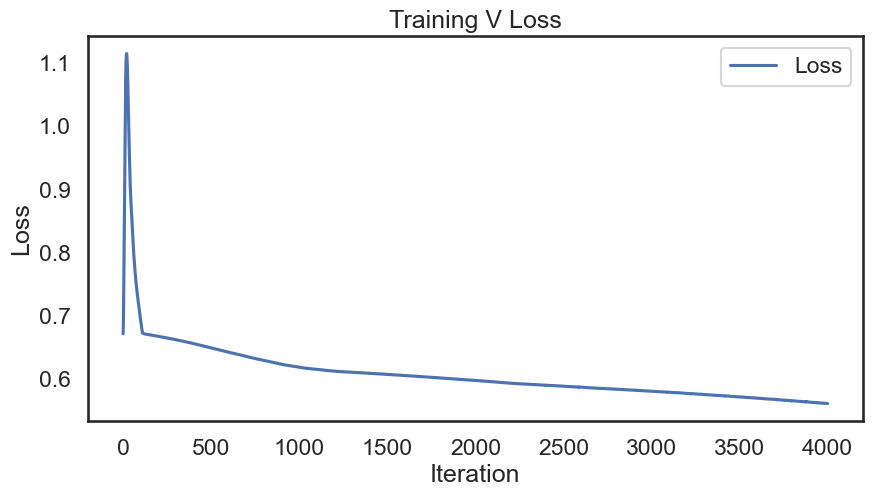

L0:tensor([0.0403], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
-----------------------Plotting Lyapunov------------------------


<Figure size 800x800 with 0 Axes>

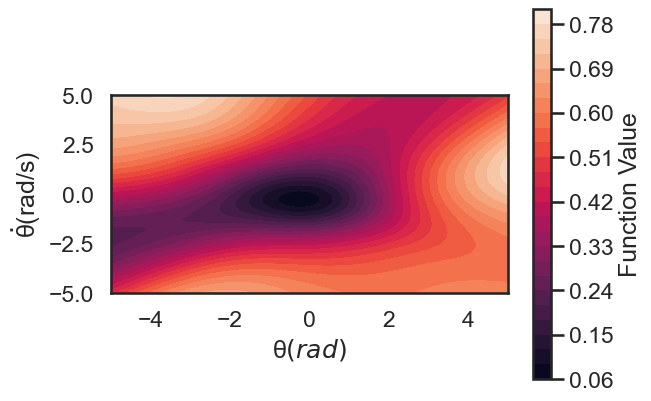

--------------------------Learning D----------------------------
Epoch [1000/5000], Loss: 0.9300502539
Epoch [2000/5000], Loss: 0.8654557467
Epoch [3000/5000], Loss: 0.8467664719
Epoch [4000/5000], Loss: 0.8336032629
Epoch [5000/5000], Loss: 0.8204417229
-----------------------Plotting Dfunction------------------------


<Figure size 800x800 with 0 Axes>

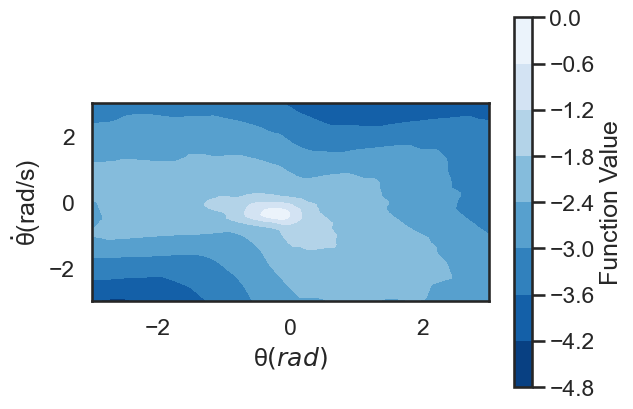

torch.sum(loss_fn(dL, DV_ext)):0.4365467131137848, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.0506], device='cuda:0', grad_fn=<SelectBackward0>)
------------------Sampling Training Data STCar------------------


sample state space: 100%|██████████| 500/500 [00:09<00:00, 51.57it/s]


------------------------Improveing Policy-----------------------


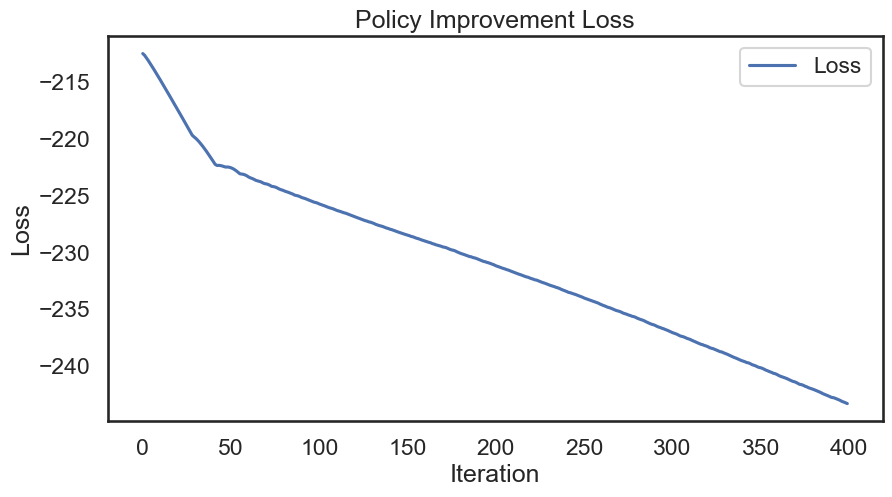

--------------------------Soft Update---------------------------


S-Curve: 100%|██████████| 499/499 [00:10<00:00, 49.36it/s]


-----------------Convergence Speed and Judgment-----------------
--------------It takes 0 steps to norm 2 ball;--------------
---------------It takes 93 steps to unit ball;---------------
----------------It takes 136 steps to converge.--------------
----------------------------------Save Data--------------------------------


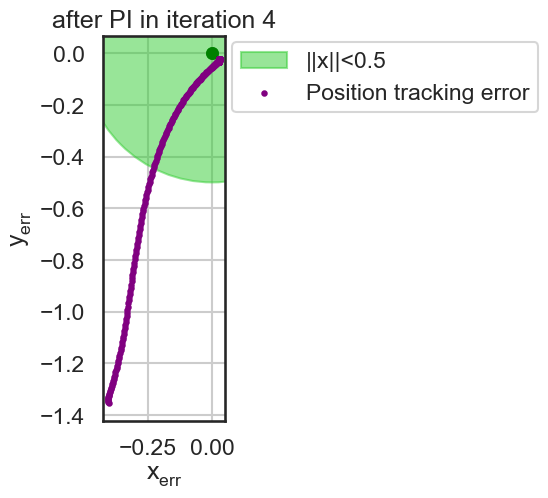

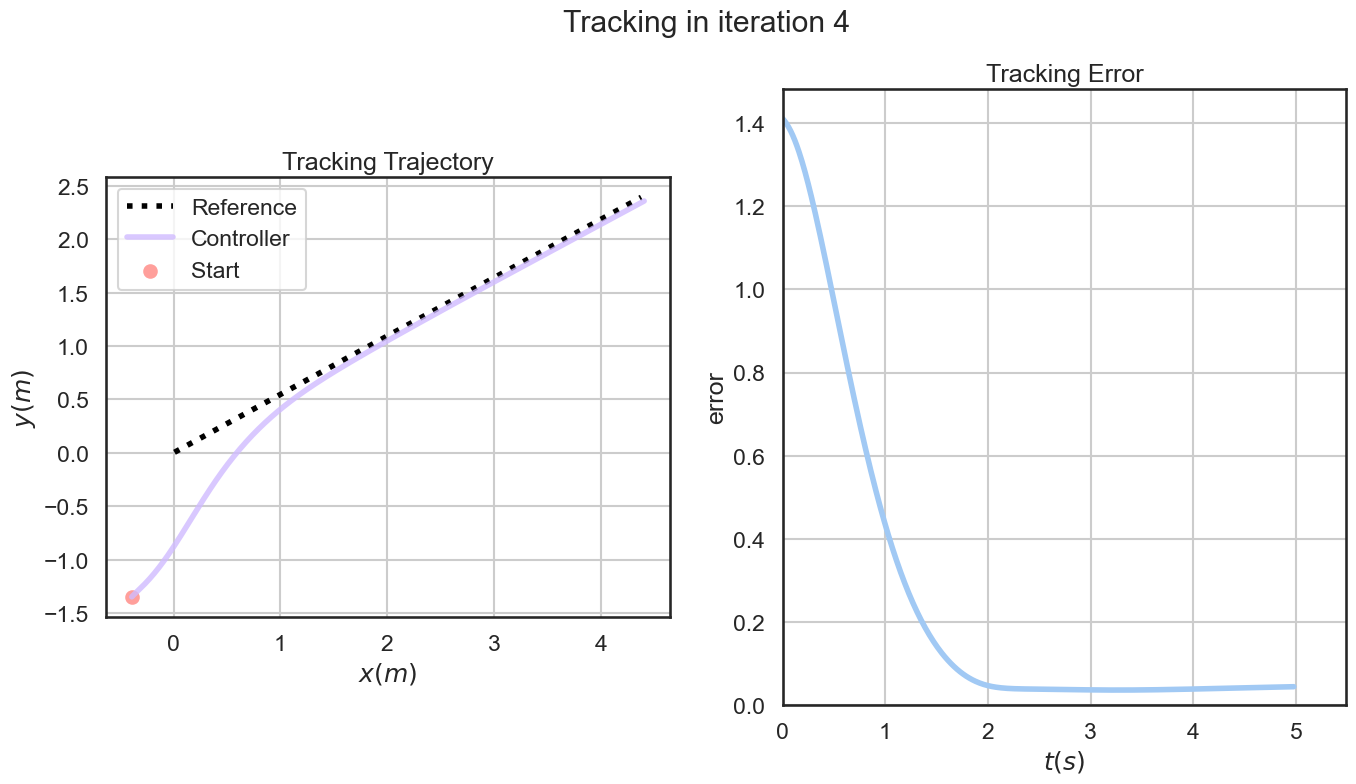

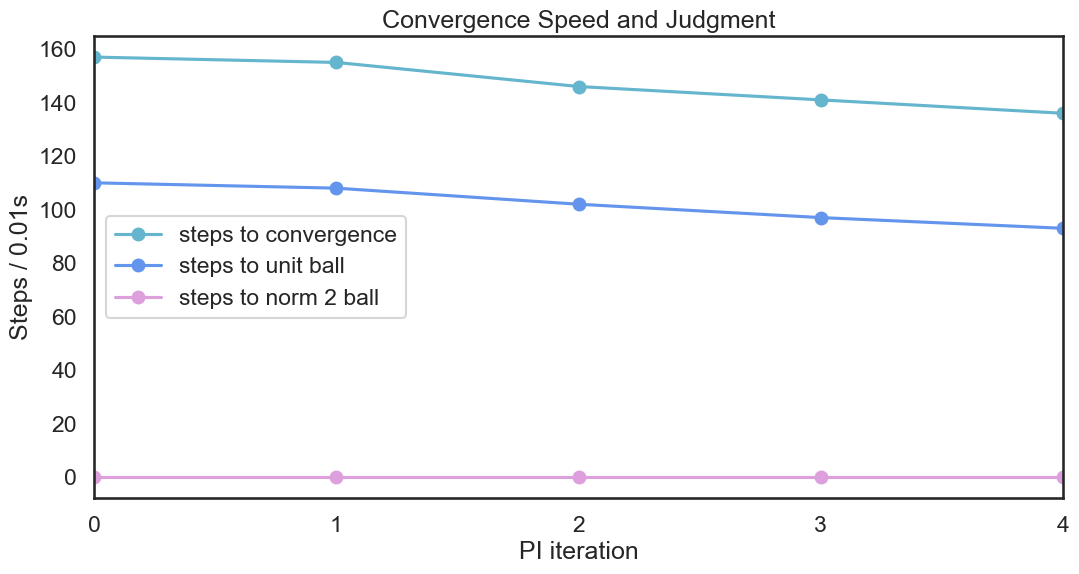

[157, 155, 146, 141, 136]
[110, 108, 102, 97, 93]
[0, 0, 0, 0, 0]
---------------------------------Iteration 5-------------------------------
------------------Sampling Training Data STCar------------------


sample state space: 100%|██████████| 2000/2000 [00:37<00:00, 53.09it/s]


--------------------------Learning V----------------------------
Epoch [1000/4000], Loss: 0.5550212860
Epoch [2000/4000], Loss: 0.5389274359
Epoch [3000/4000], Loss: 0.5292582512
Epoch [4000/4000], Loss: 0.5164778233


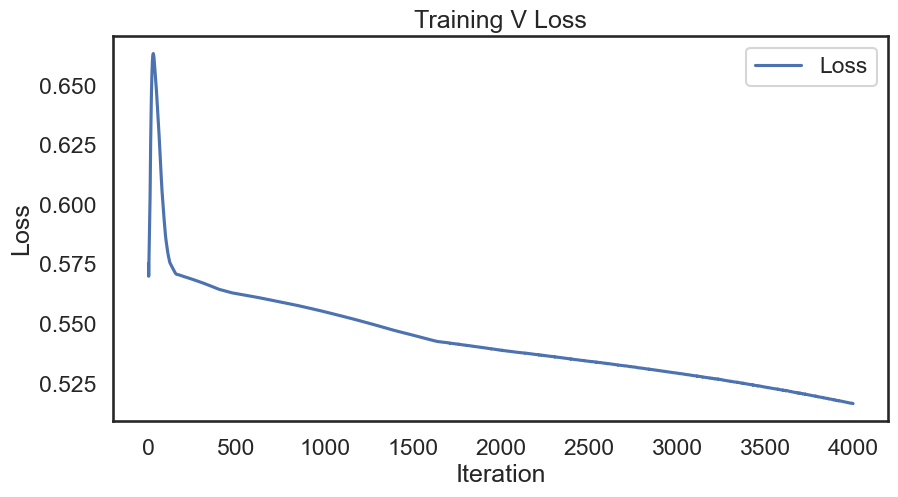

L0:tensor([0.0277], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
-----------------------Plotting Lyapunov------------------------


<Figure size 800x800 with 0 Axes>

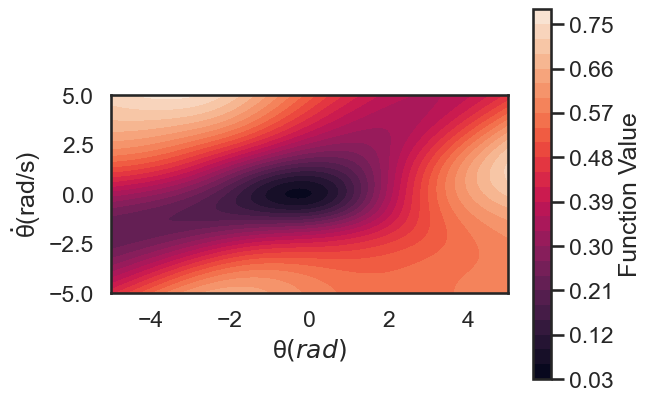

--------------------------Learning D----------------------------
Epoch [1000/5000], Loss: 1.0047141314
Epoch [2000/5000], Loss: 0.8534631729
Epoch [3000/5000], Loss: 0.8237526417
Epoch [4000/5000], Loss: 0.8150936365
Epoch [5000/5000], Loss: 0.8050307631
-----------------------Plotting Dfunction------------------------


<Figure size 800x800 with 0 Axes>

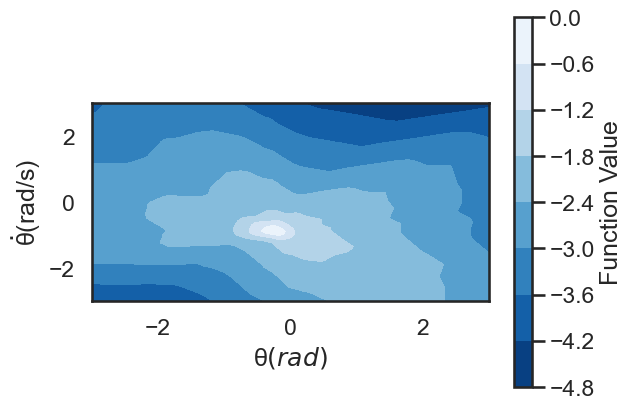

torch.sum(loss_fn(dL, DV_ext)):0.42015156149864197, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.0849], device='cuda:0', grad_fn=<SelectBackward0>)
------------------Sampling Training Data STCar------------------


sample state space: 100%|██████████| 500/500 [00:08<00:00, 55.78it/s]


------------------------Improveing Policy-----------------------


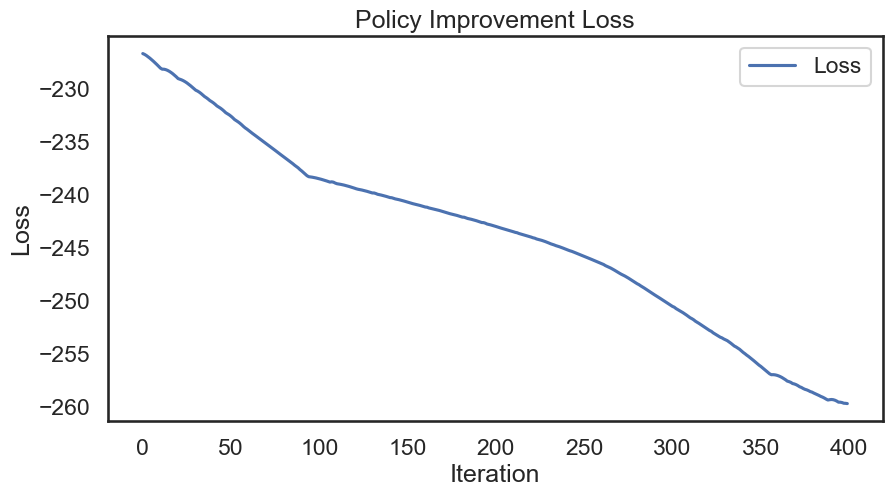

--------------------------Soft Update---------------------------


S-Curve: 100%|██████████| 499/499 [00:09<00:00, 54.62it/s]


-----------------Convergence Speed and Judgment-----------------
--------------It takes 0 steps to norm 2 ball;--------------
---------------It takes 90 steps to unit ball;---------------
----------------It takes 132 steps to converge.--------------
----------------------------------Save Data--------------------------------


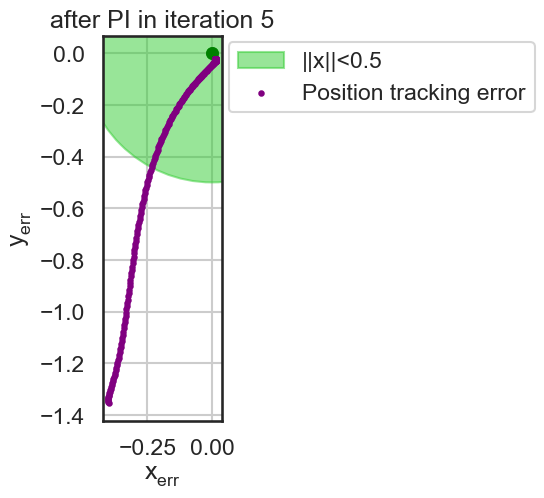

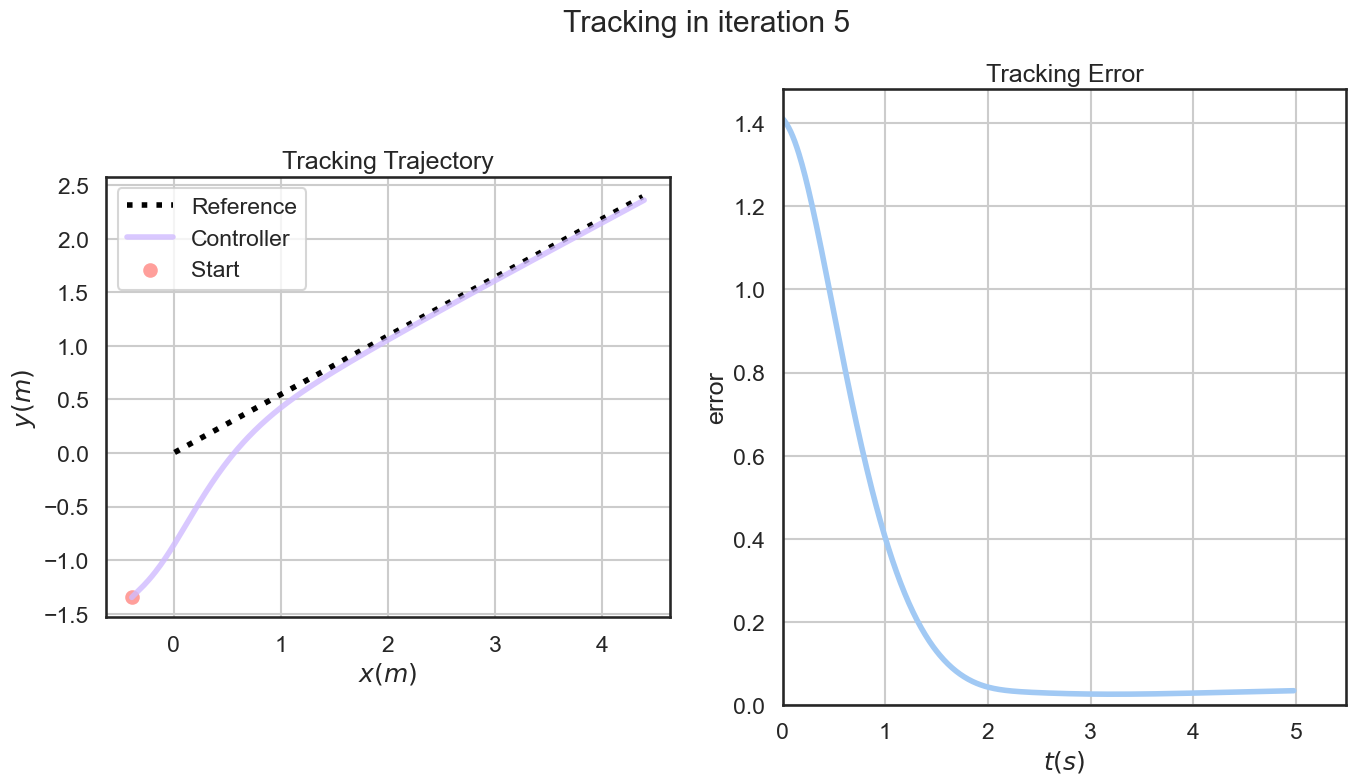

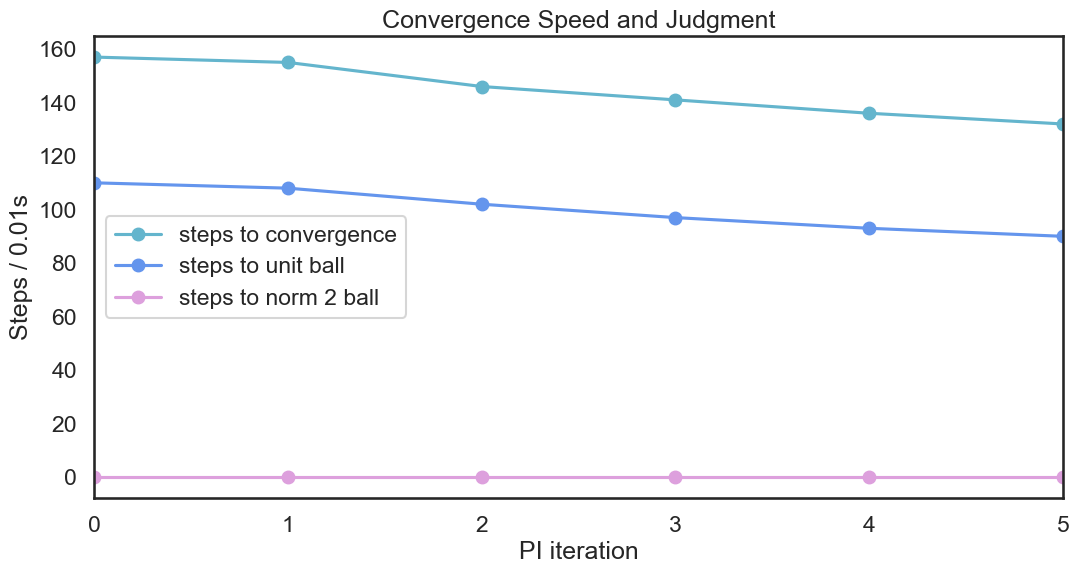

[157, 155, 146, 141, 136, 132]
[110, 108, 102, 97, 93, 90]
[0, 0, 0, 0, 0, 0]
---------------------------------Iteration 6-------------------------------
------------------Sampling Training Data STCar------------------


sample state space: 100%|██████████| 2000/2000 [00:36<00:00, 54.72it/s]


--------------------------Learning V----------------------------
Epoch [1000/4000], Loss: 0.4963445961
Epoch [2000/4000], Loss: 0.4852711558
Epoch [3000/4000], Loss: 0.4721092880
Epoch [4000/4000], Loss: 0.4558367729


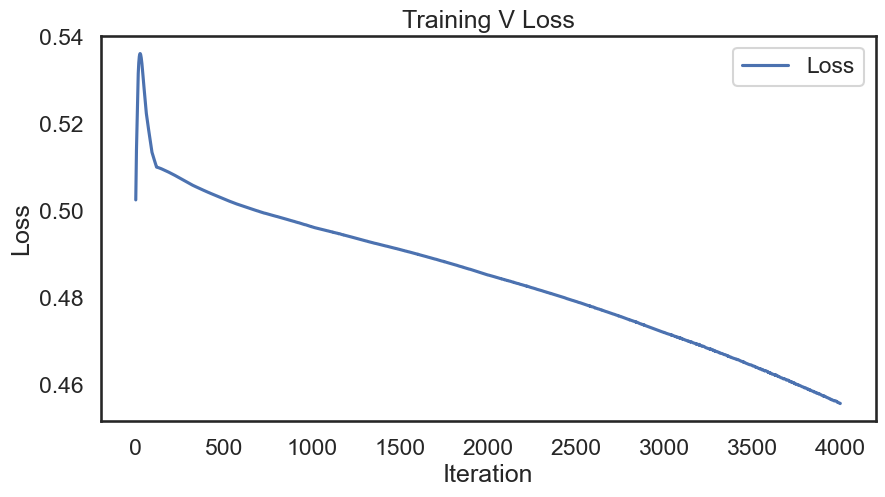

L0:tensor([0.0195], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:8.133240044116974e-06, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
-----------------------Plotting Lyapunov------------------------


<Figure size 800x800 with 0 Axes>

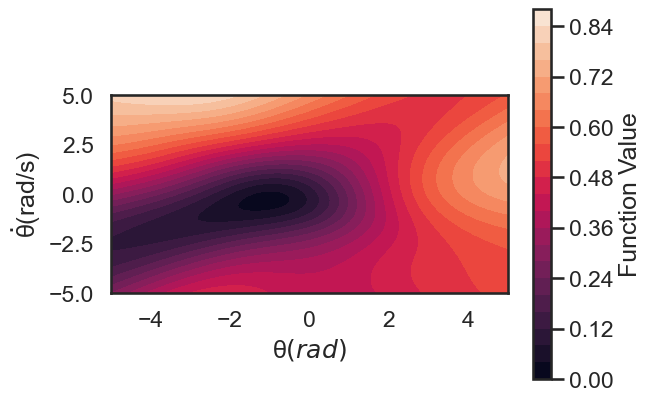

--------------------------Learning D----------------------------
Epoch [1000/5000], Loss: 1.0322778225
Epoch [2000/5000], Loss: 0.8815550804
Epoch [3000/5000], Loss: 0.8582777977
Epoch [4000/5000], Loss: 0.8513824344
Epoch [5000/5000], Loss: 0.8435346484
-----------------------Plotting Dfunction------------------------


<Figure size 800x800 with 0 Axes>

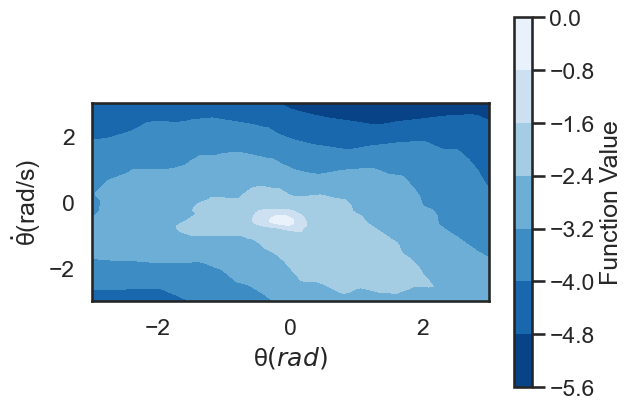

torch.sum(loss_fn(dL, DV_ext)):0.45617106556892395, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.1146], device='cuda:0', grad_fn=<SelectBackward0>)
------------------Sampling Training Data STCar------------------


sample state space: 100%|██████████| 500/500 [00:08<00:00, 57.67it/s]


------------------------Improveing Policy-----------------------


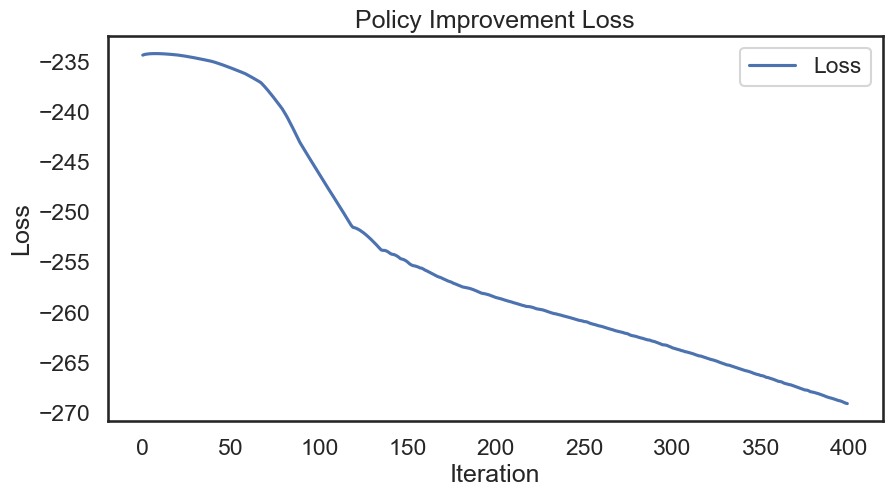

--------------------------Soft Update---------------------------


S-Curve: 100%|██████████| 499/499 [00:09<00:00, 53.61it/s]


-----------------Convergence Speed and Judgment-----------------
--------------It takes 0 steps to norm 2 ball;--------------
---------------It takes 85 steps to unit ball;---------------
----------------It takes 125 steps to converge.--------------
----------------------------------Save Data--------------------------------


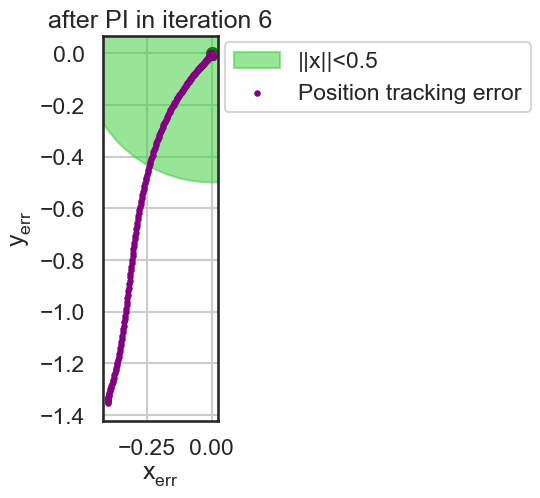

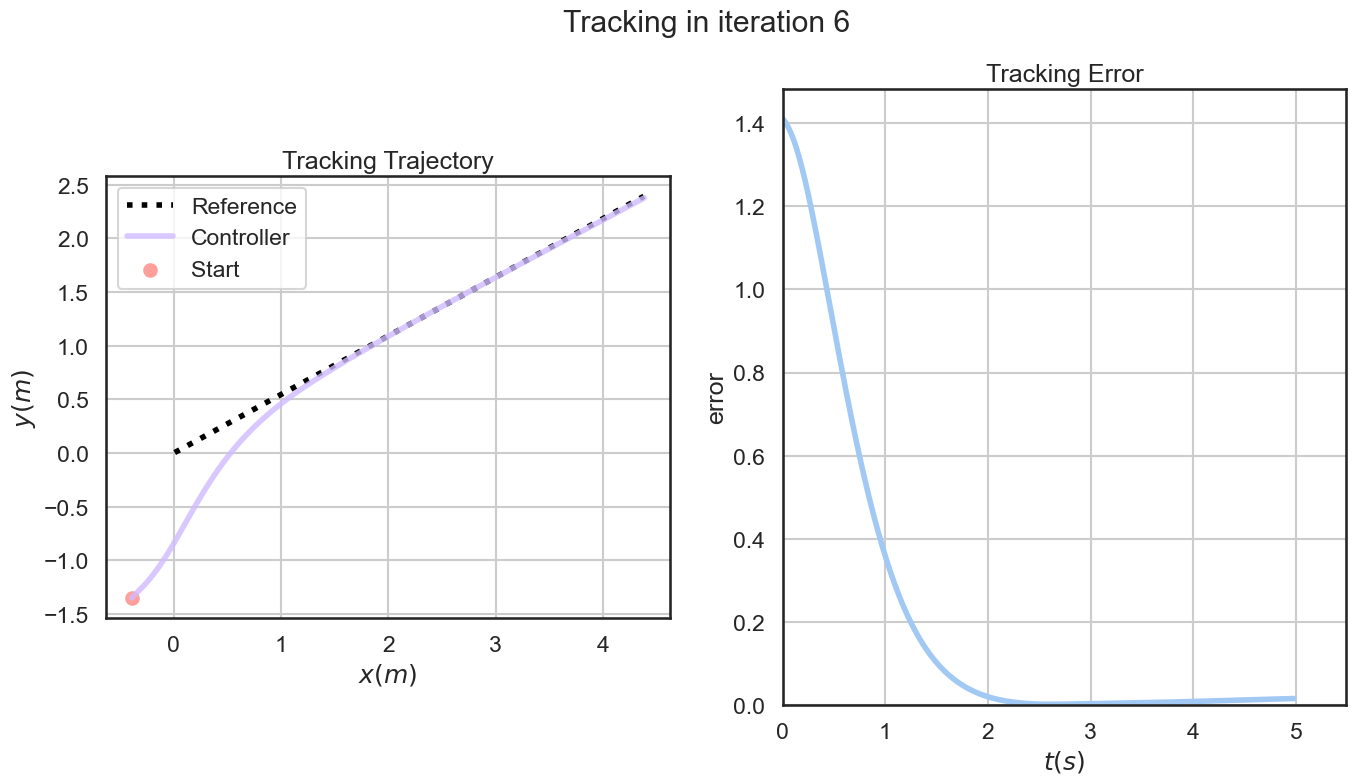

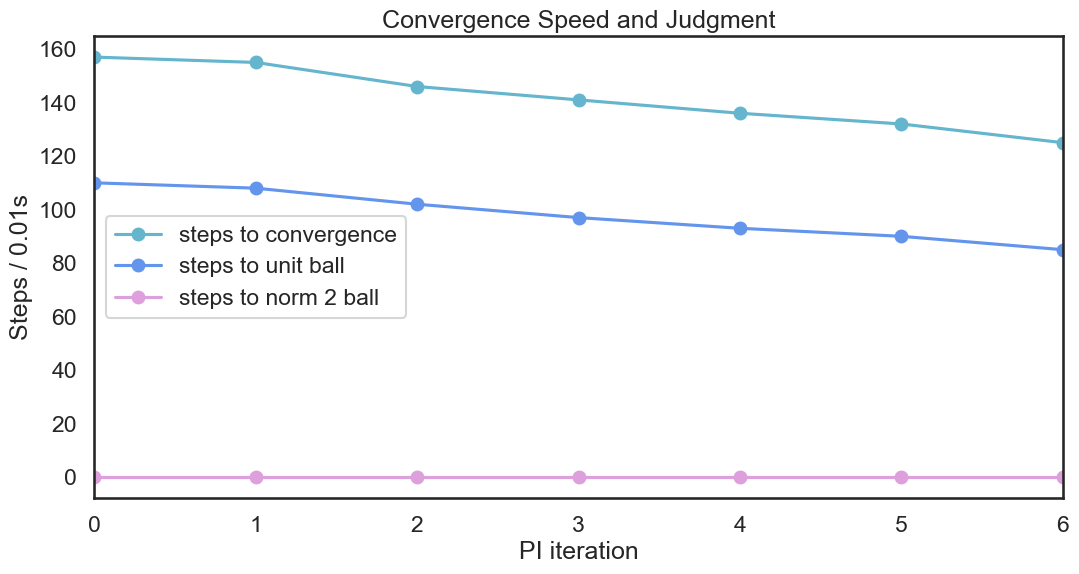

[157, 155, 146, 141, 136, 132, 125]
[110, 108, 102, 97, 93, 90, 85]
[0, 0, 0, 0, 0, 0, 0]
---------------------------------Iteration 7-------------------------------
------------------Sampling Training Data STCar------------------


sample state space: 100%|██████████| 2000/2000 [00:39<00:00, 50.33it/s]


--------------------------Learning V----------------------------
Epoch [1000/4000], Loss: 0.4535506964
Epoch [2000/4000], Loss: 0.4465072155
Epoch [3000/4000], Loss: 0.4392677546
Epoch [4000/4000], Loss: 0.4301960468


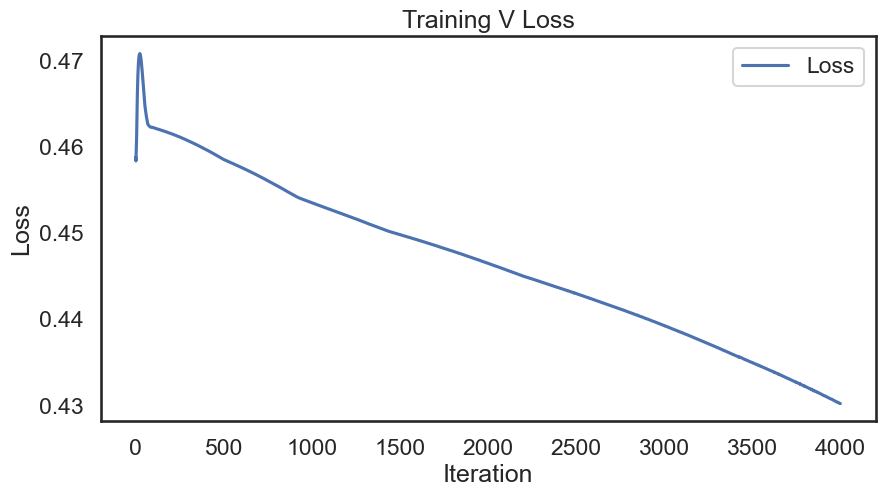

L0:tensor([0.0180], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:2.366257831454277e-06, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
-----------------------Plotting Lyapunov------------------------


<Figure size 800x800 with 0 Axes>

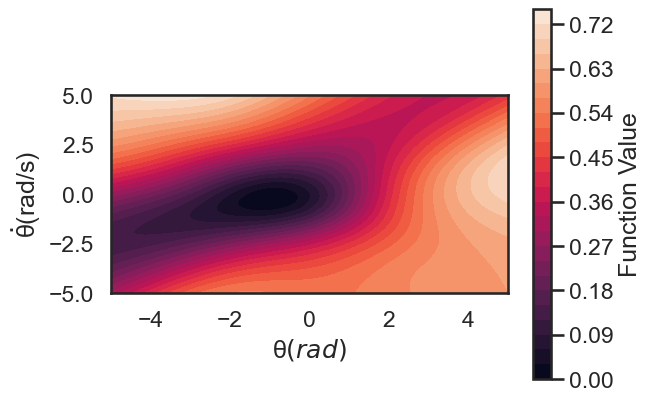

--------------------------Learning D----------------------------
Epoch [1000/5000], Loss: 1.1951144934
Epoch [2000/5000], Loss: 0.8771861792
Epoch [3000/5000], Loss: 0.8323402405
Epoch [4000/5000], Loss: 0.8255402446
Epoch [5000/5000], Loss: 0.8184304237
-----------------------Plotting Dfunction------------------------


<Figure size 800x800 with 0 Axes>

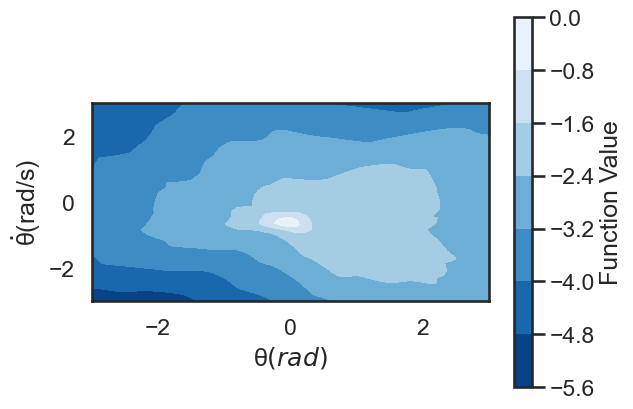

torch.sum(loss_fn(dL, DV_ext)):0.4399753510951996, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.0874], device='cuda:0', grad_fn=<SelectBackward0>)
------------------Sampling Training Data STCar------------------


sample state space: 100%|██████████| 500/500 [00:09<00:00, 50.93it/s]


------------------------Improveing Policy-----------------------


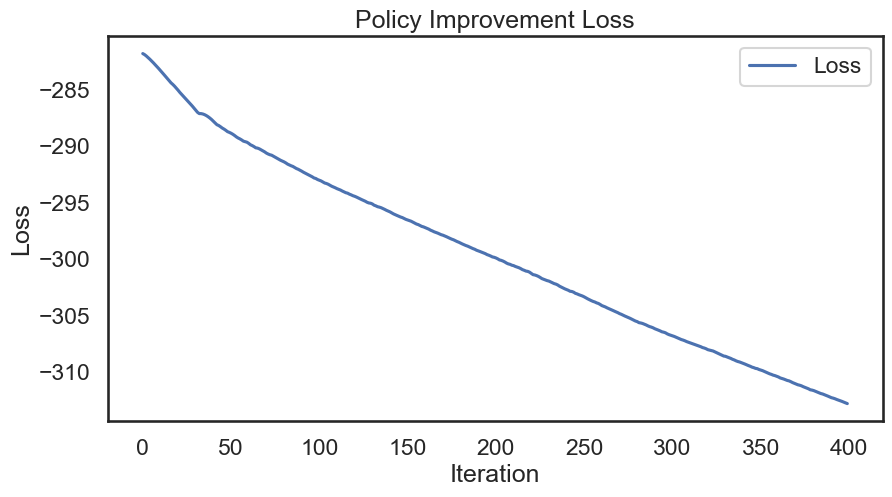

--------------------------Soft Update---------------------------


S-Curve: 100%|██████████| 499/499 [00:10<00:00, 48.78it/s]


-----------------Convergence Speed and Judgment-----------------
--------------It takes 0 steps to norm 2 ball;--------------
---------------It takes 82 steps to unit ball;---------------
----------------It takes 122 steps to converge.--------------
----------------------------------Save Data--------------------------------


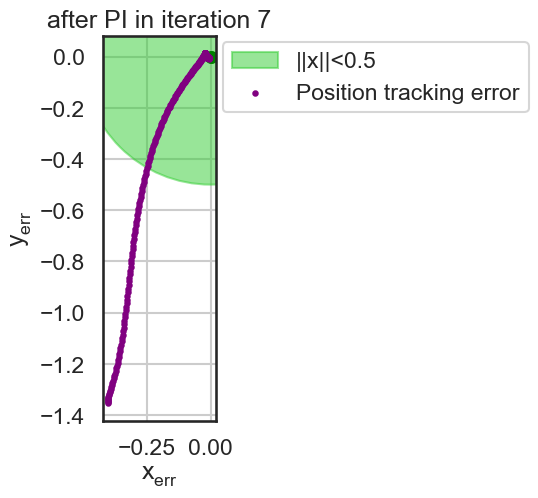

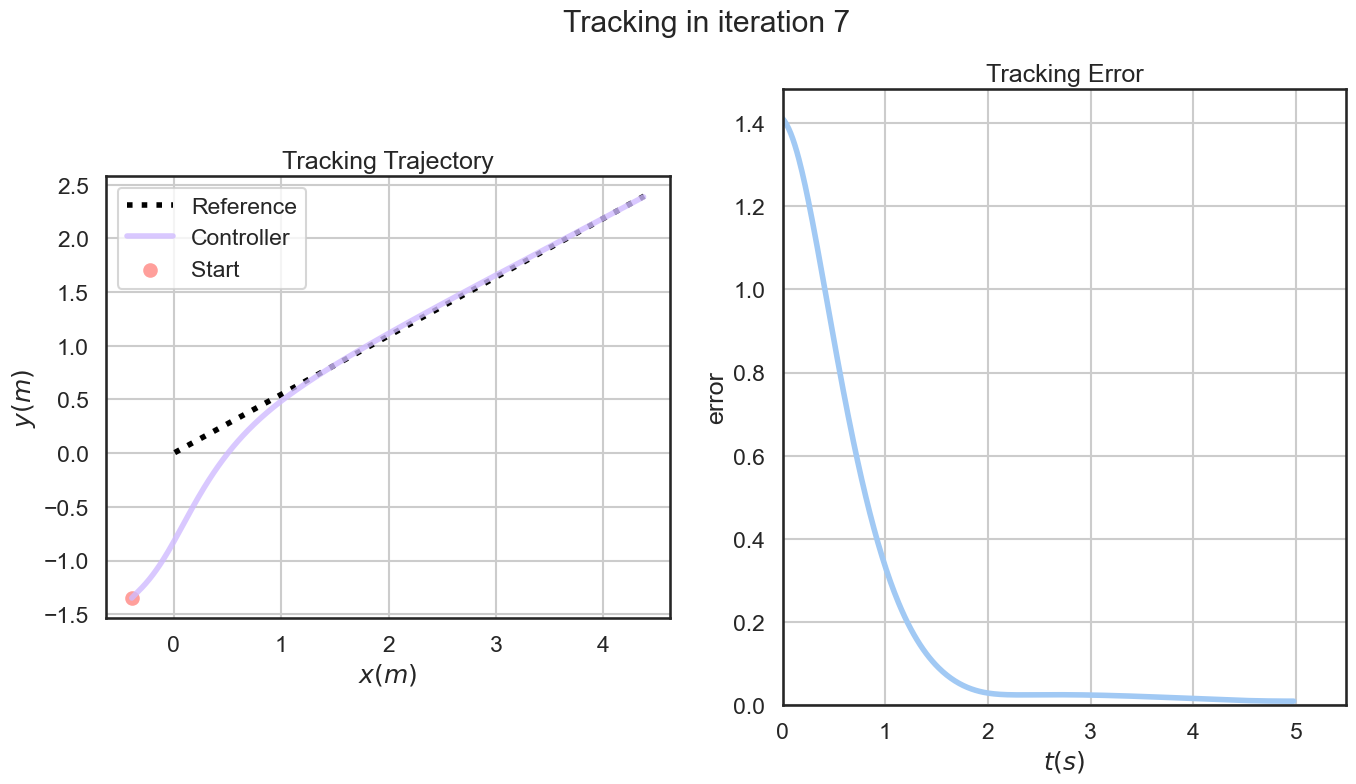

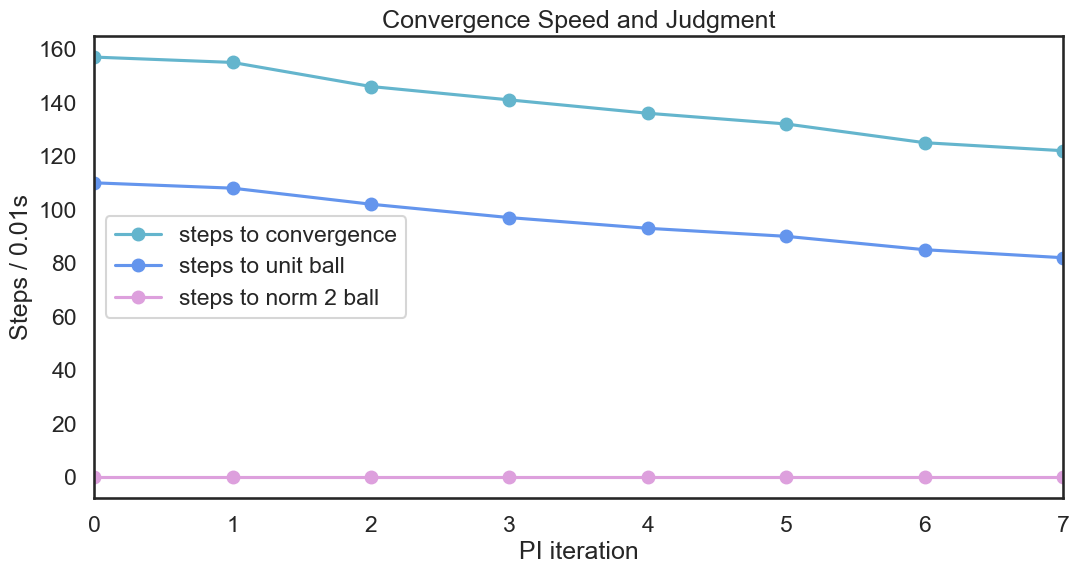

[157, 155, 146, 141, 136, 132, 125, 122]
[110, 108, 102, 97, 93, 90, 85, 82]
[0, 0, 0, 0, 0, 0, 0, 0]
---------------------------------Iteration 8-------------------------------
------------------Sampling Training Data STCar------------------


sample state space: 100%|██████████| 2000/2000 [00:38<00:00, 51.96it/s]


--------------------------Learning V----------------------------
Epoch [1000/4000], Loss: 0.4310503006
Epoch [2000/4000], Loss: 0.4253703058
Epoch [3000/4000], Loss: 0.4180723727
Epoch [4000/4000], Loss: 0.4084673226


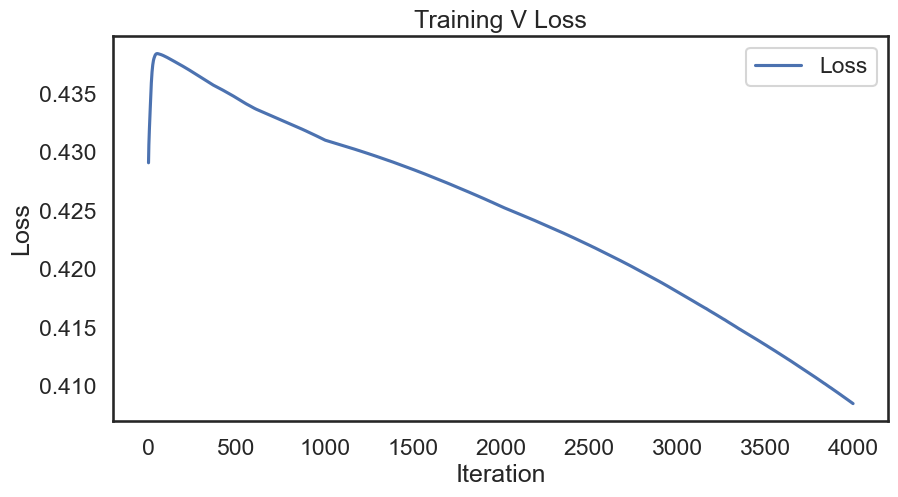

L0:tensor([0.0180], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.06568282842636108
--------------------------Soft Update---------------------------
-----------------------Plotting Lyapunov------------------------


<Figure size 800x800 with 0 Axes>

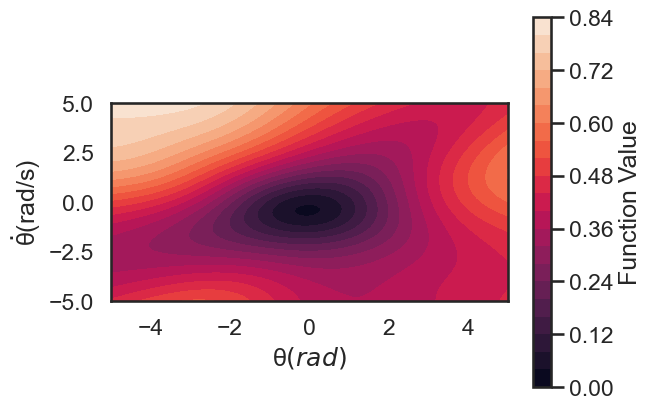

--------------------------Learning D----------------------------
Epoch [1000/5000], Loss: 0.8896411657
Epoch [2000/5000], Loss: 0.8632696867
Epoch [3000/5000], Loss: 0.8565033674
Epoch [4000/5000], Loss: 0.8495737314
Epoch [5000/5000], Loss: 0.8412218094
-----------------------Plotting Dfunction------------------------


<Figure size 800x800 with 0 Axes>

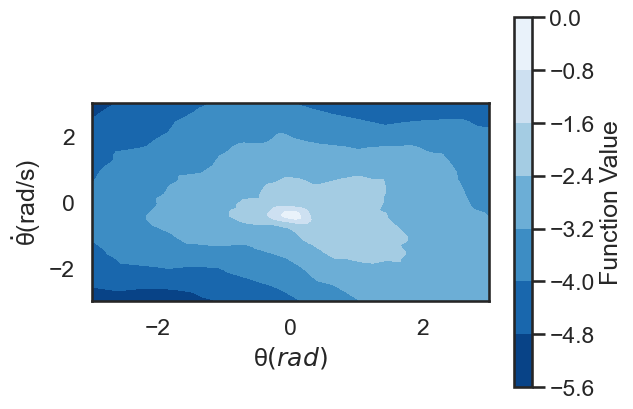

torch.sum(loss_fn(dL, DV_ext)):0.46476495265960693, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.0835], device='cuda:0', grad_fn=<SelectBackward0>)
------------------Sampling Training Data STCar------------------


sample state space: 100%|██████████| 500/500 [00:10<00:00, 49.86it/s]


------------------------Improveing Policy-----------------------


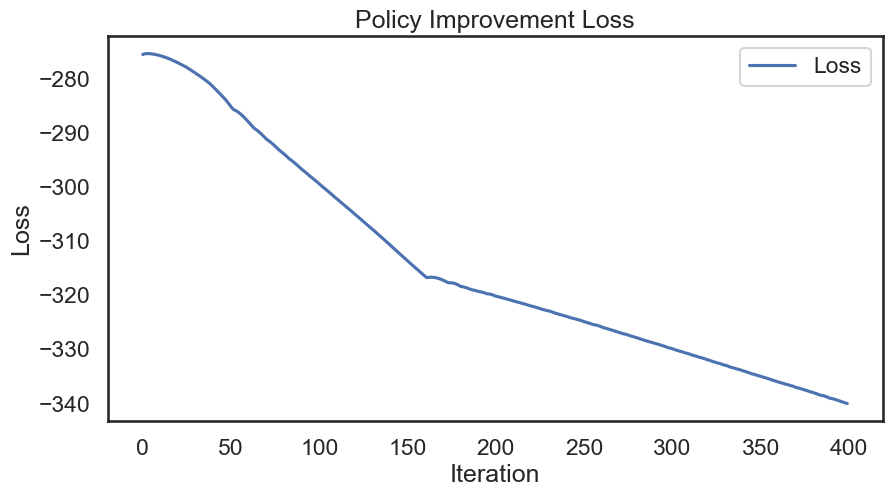

--------------------------Soft Update---------------------------


S-Curve: 100%|██████████| 499/499 [00:09<00:00, 51.67it/s]


-----------------Convergence Speed and Judgment-----------------
--------------It takes 0 steps to norm 2 ball;--------------
---------------It takes 79 steps to unit ball;---------------
----------------It takes 119 steps to converge.--------------
----------------------------------Save Data--------------------------------


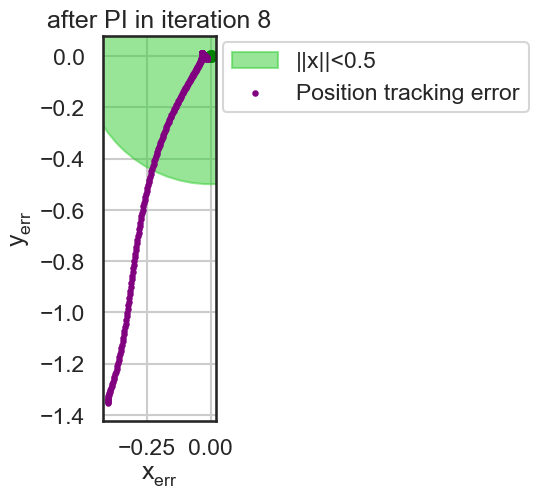

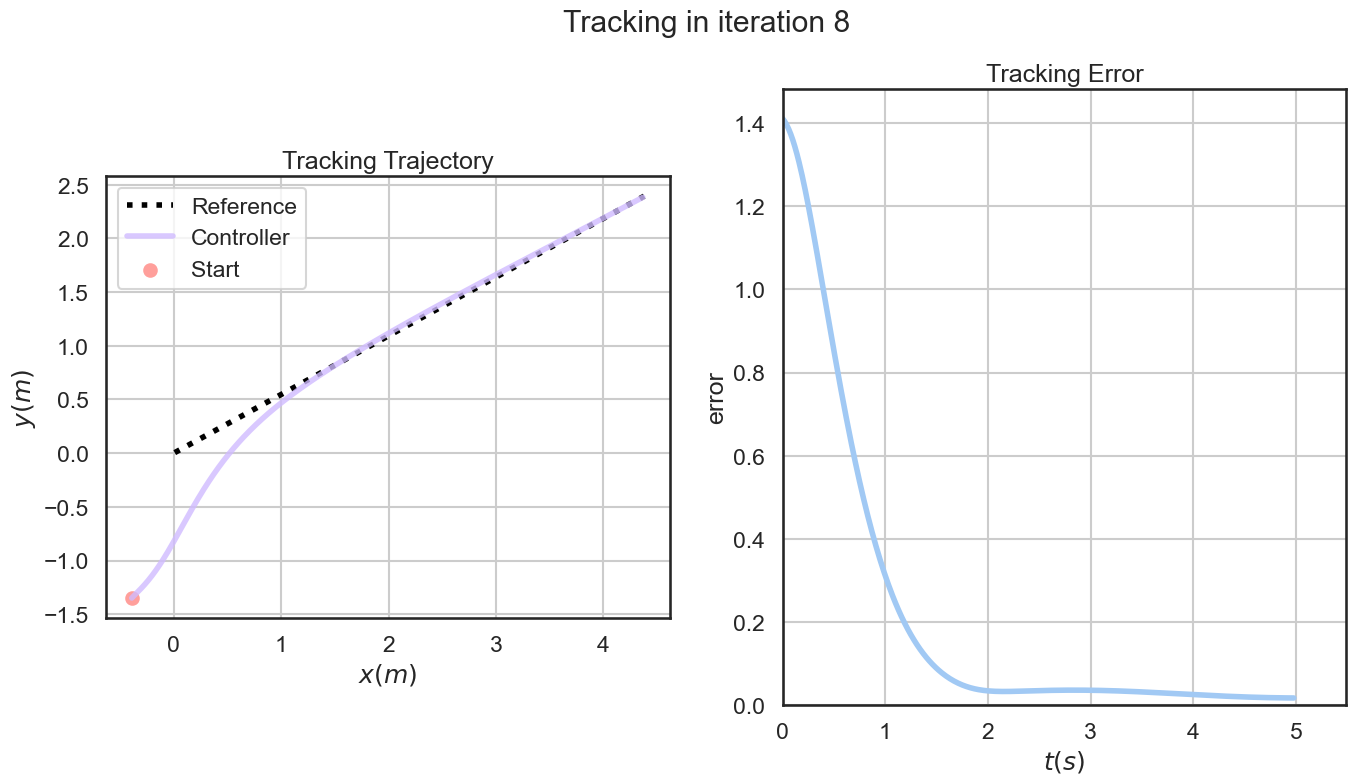

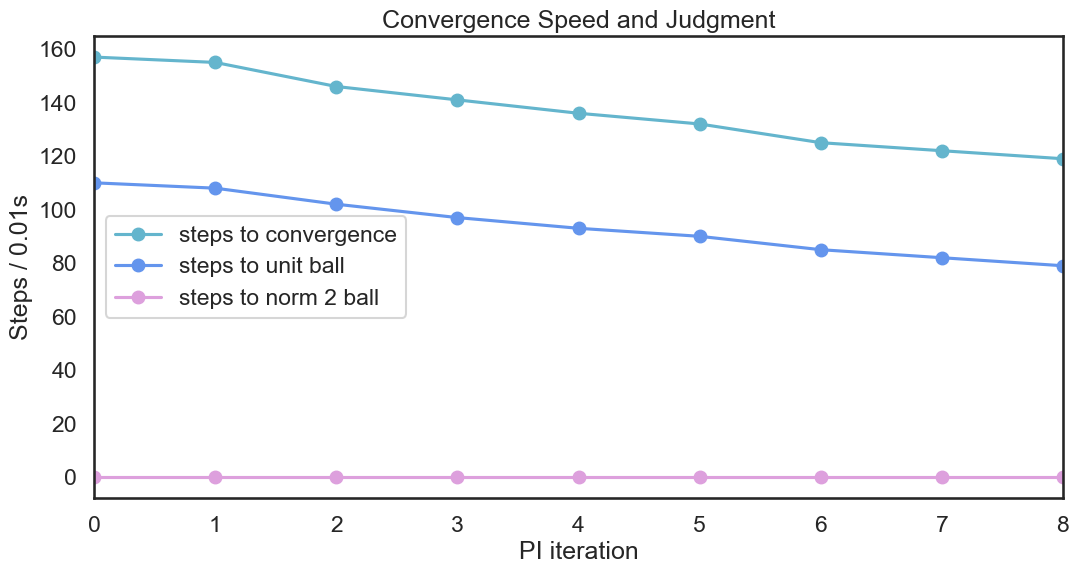

[157, 155, 146, 141, 136, 132, 125, 122, 119]
[110, 108, 102, 97, 93, 90, 85, 82, 79]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
---------------------------------Iteration 9-------------------------------
------------------Sampling Training Data STCar------------------


sample state space: 100%|██████████| 2000/2000 [00:40<00:00, 48.92it/s]


--------------------------Learning V----------------------------
Epoch [1000/4000], Loss: 0.4110431075
Epoch [2000/4000], Loss: 0.4037885666
Epoch [3000/4000], Loss: 0.3955747187
Epoch [4000/4000], Loss: 0.3847703338


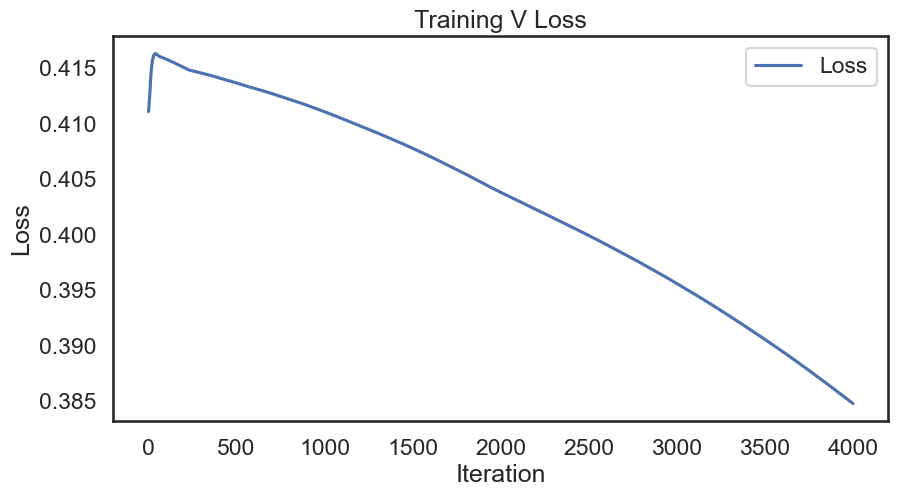

L0:tensor([0.0158], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:7.808557711541653e-07, 
torch.sum(F.relu(dL)):0.10071992874145508
--------------------------Soft Update---------------------------
-----------------------Plotting Lyapunov------------------------


<Figure size 800x800 with 0 Axes>

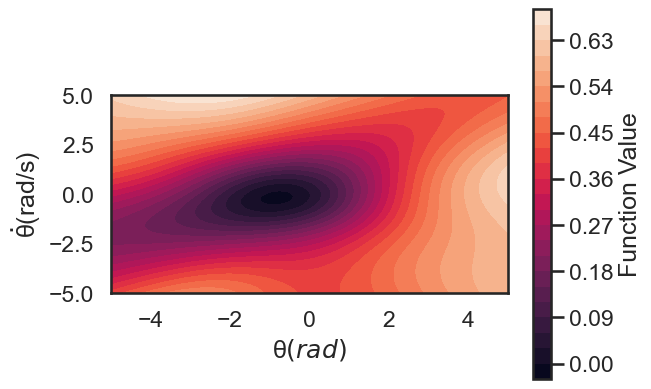

--------------------------Learning D----------------------------
Epoch [1000/5000], Loss: 1.4386670589
Epoch [2000/5000], Loss: 1.0845443010
Epoch [3000/5000], Loss: 1.0263329744
Epoch [4000/5000], Loss: 0.9794966578
Epoch [5000/5000], Loss: 0.9260395765
-----------------------Plotting Dfunction------------------------


<Figure size 800x800 with 0 Axes>

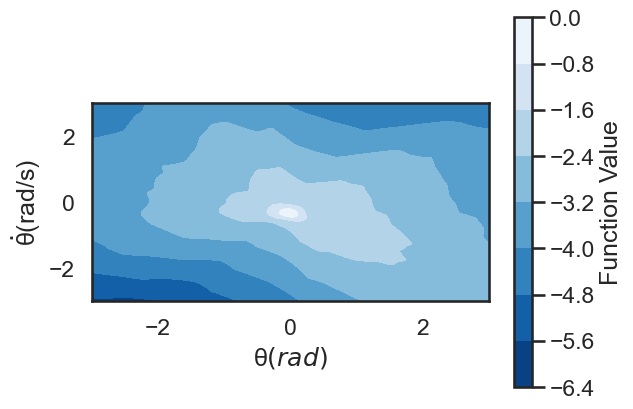

torch.sum(loss_fn(dL, DV_ext)):0.4071029722690582, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.3864], device='cuda:0', grad_fn=<SelectBackward0>)
------------------Sampling Training Data STCar------------------


sample state space: 100%|██████████| 500/500 [00:09<00:00, 51.40it/s]


------------------------Improveing Policy-----------------------


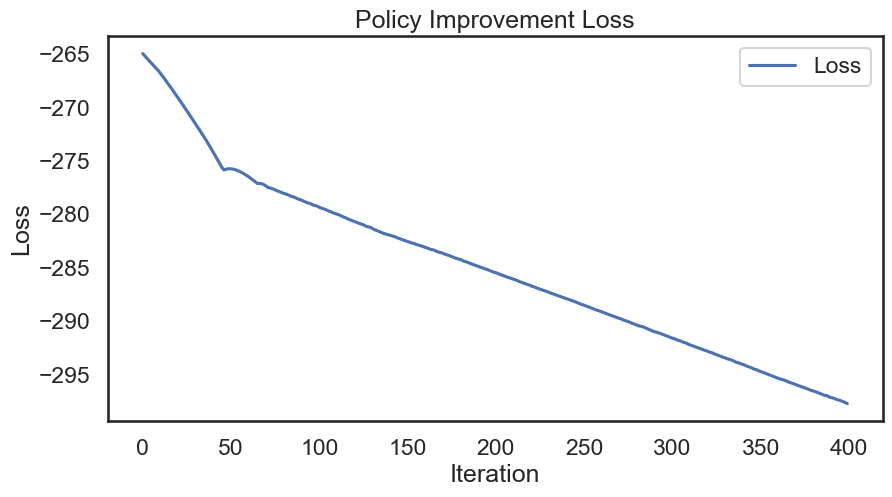

--------------------------Soft Update---------------------------


S-Curve: 100%|██████████| 499/499 [00:10<00:00, 48.16it/s]


-----------------Convergence Speed and Judgment-----------------
--------------It takes 0 steps to norm 2 ball;--------------
---------------It takes 75 steps to unit ball;---------------
----------------It takes 113 steps to converge.--------------
----------------------------------Save Data--------------------------------


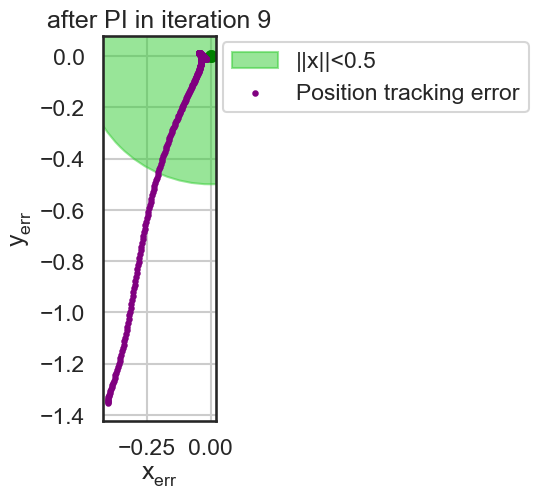

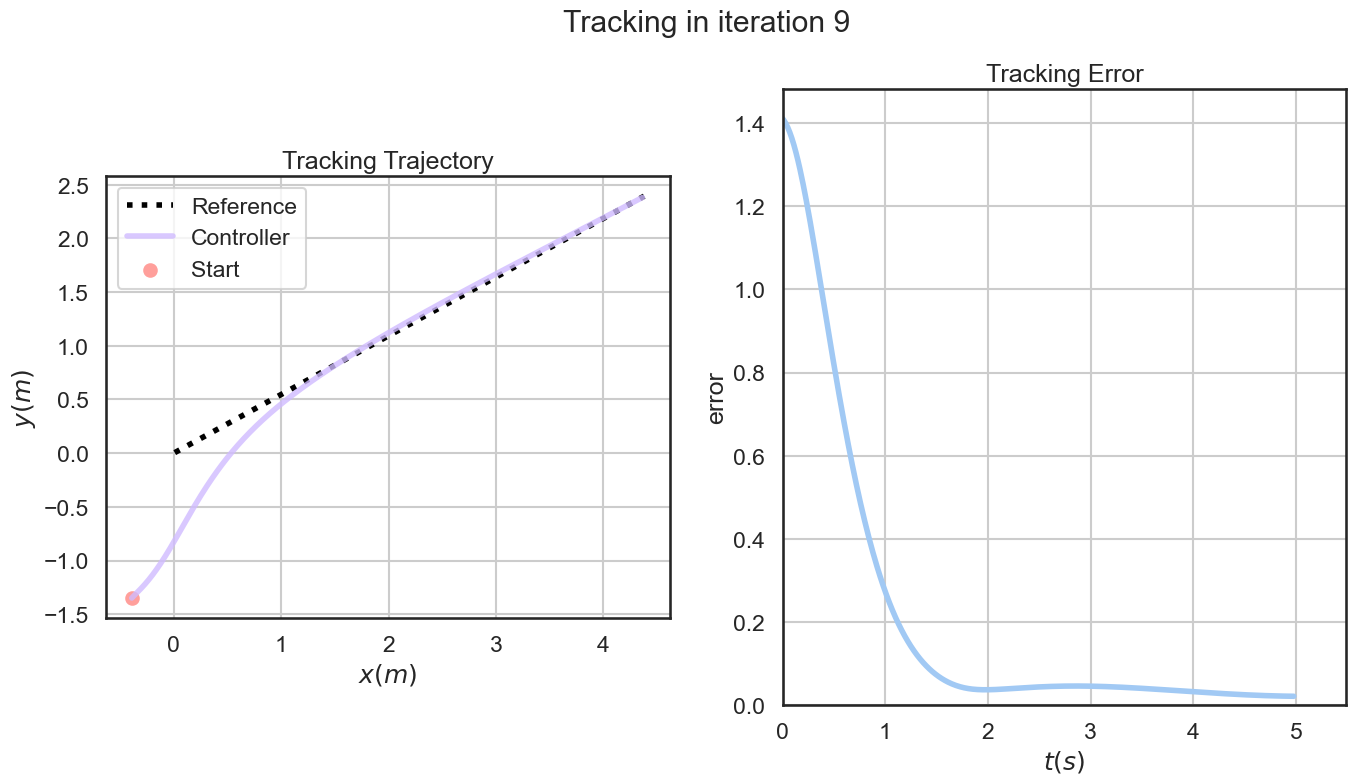

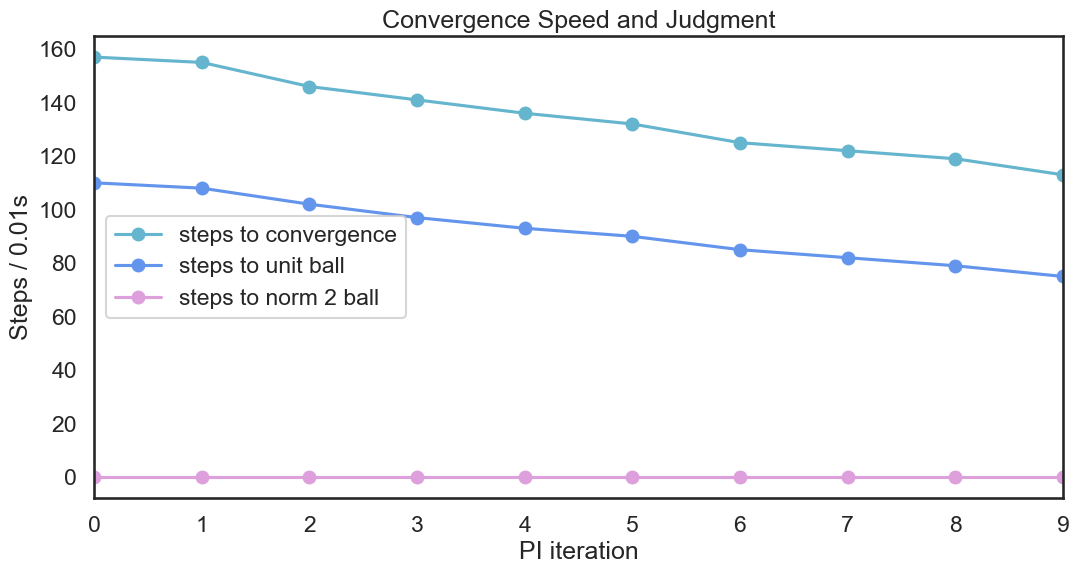

[157, 155, 146, 141, 136, 132, 125, 122, 119, 113]
[110, 108, 102, 97, 93, 90, 85, 82, 79, 75]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---------------------------------Iteration 10-------------------------------
------------------Sampling Training Data STCar------------------


sample state space: 100%|██████████| 2000/2000 [00:42<00:00, 46.99it/s]


--------------------------Learning V----------------------------
Epoch [1000/4000], Loss: 0.3837662637
Epoch [2000/4000], Loss: 0.3801014423
Epoch [3000/4000], Loss: 0.3748581409
Epoch [4000/4000], Loss: 0.3674517274


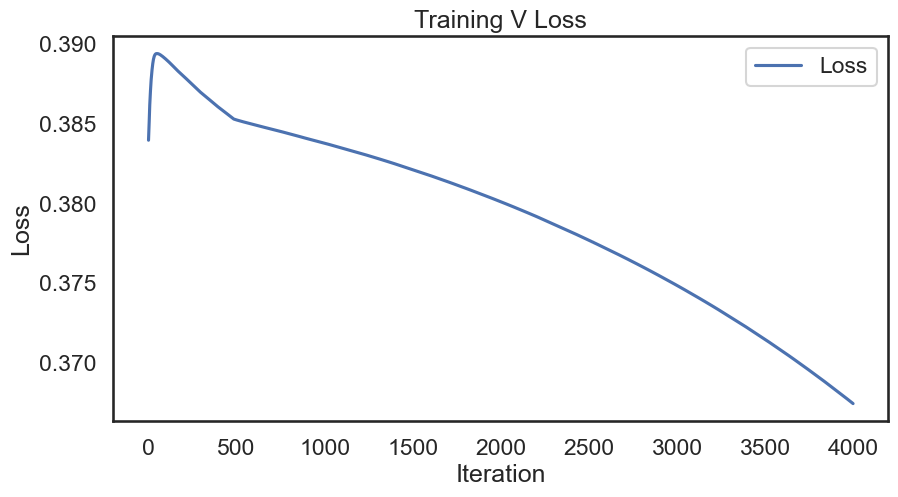

L0:tensor([0.0165], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:1.480686478316784e-06, 
torch.sum(F.relu(dL)):0.02858489751815796
--------------------------Soft Update---------------------------
-----------------------Plotting Lyapunov------------------------


<Figure size 800x800 with 0 Axes>

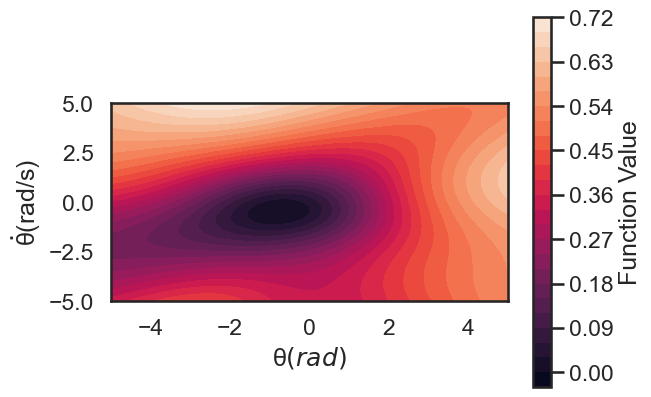

--------------------------Learning D----------------------------
Epoch [1000/5000], Loss: 1.2074182034
Epoch [2000/5000], Loss: 0.9810370207
Epoch [3000/5000], Loss: 0.9416452646
Epoch [4000/5000], Loss: 0.9177192450
Epoch [5000/5000], Loss: 0.8879850507
-----------------------Plotting Dfunction------------------------


<Figure size 800x800 with 0 Axes>

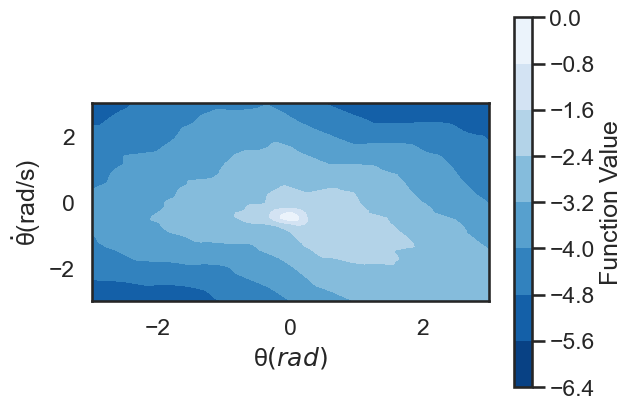

torch.sum(loss_fn(dL, DV_ext)):0.42462608218193054, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.3046], device='cuda:0', grad_fn=<SelectBackward0>)
------------------Sampling Training Data STCar------------------


sample state space: 100%|██████████| 500/500 [00:09<00:00, 55.00it/s]


------------------------Improveing Policy-----------------------


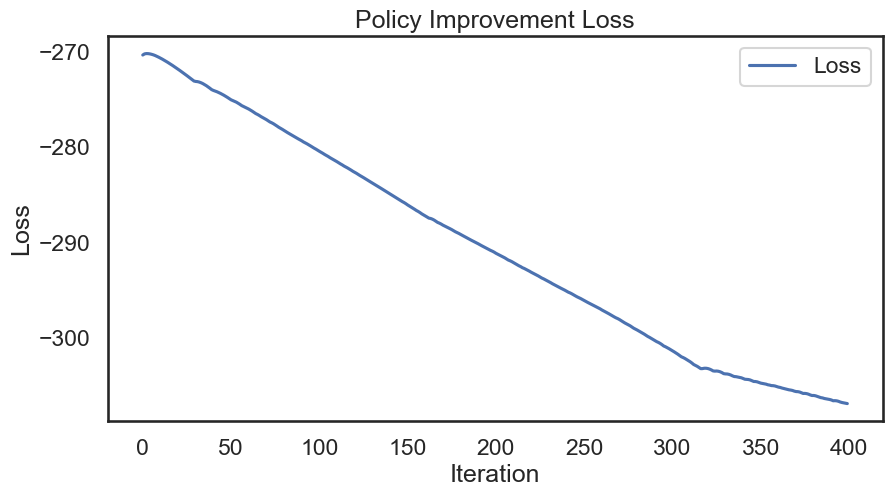

--------------------------Soft Update---------------------------


S-Curve: 100%|██████████| 499/499 [00:10<00:00, 48.19it/s]


-----------------Convergence Speed and Judgment-----------------
--------------It takes 0 steps to norm 2 ball;--------------
---------------It takes 73 steps to unit ball;---------------
----------------It takes 110 steps to converge.--------------
----------------------------------Save Data--------------------------------


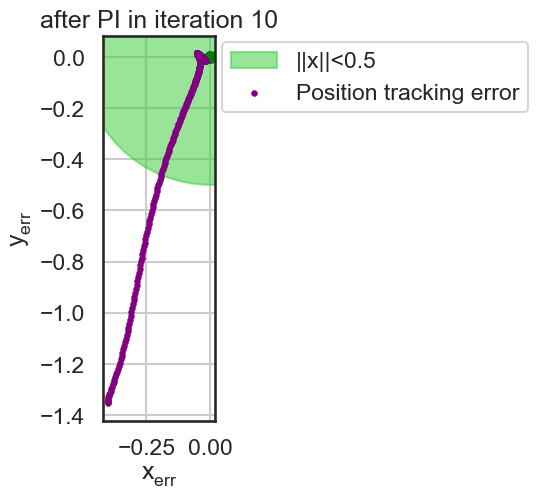

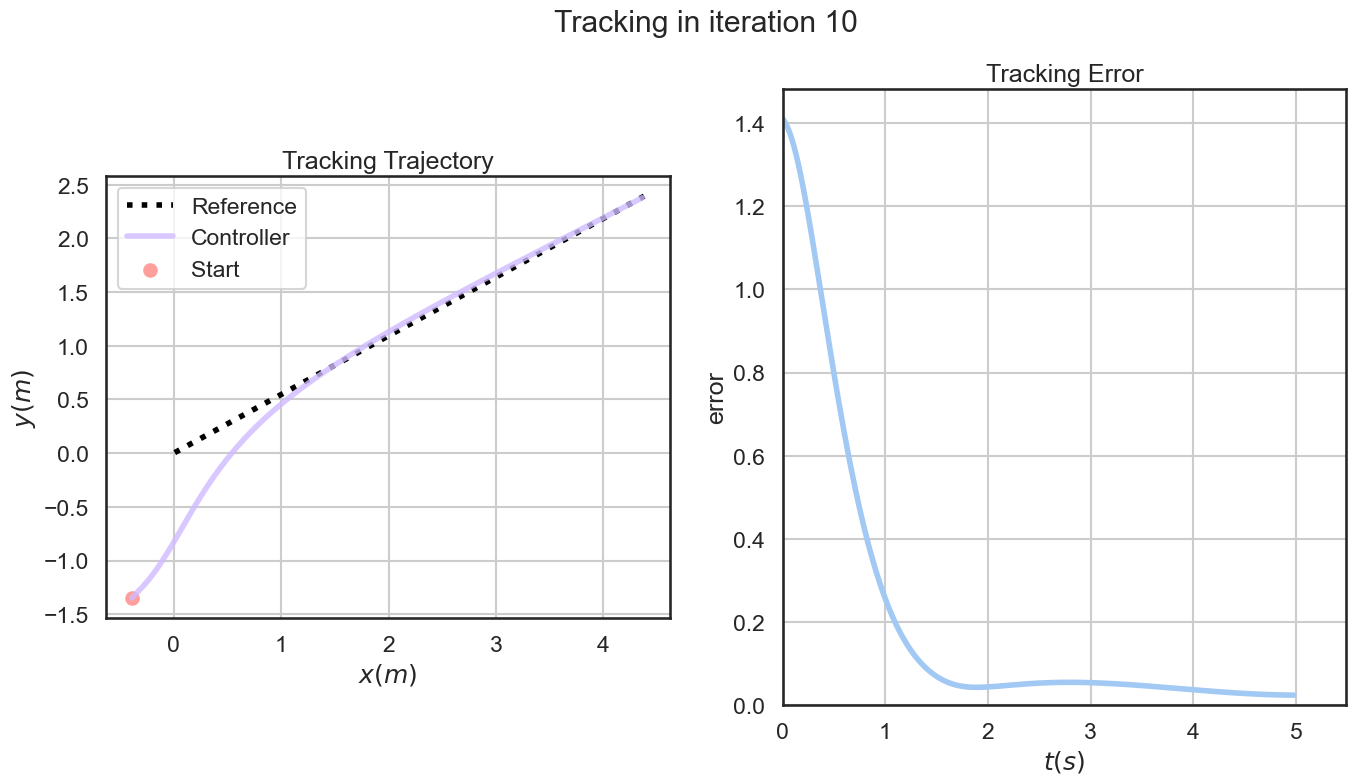

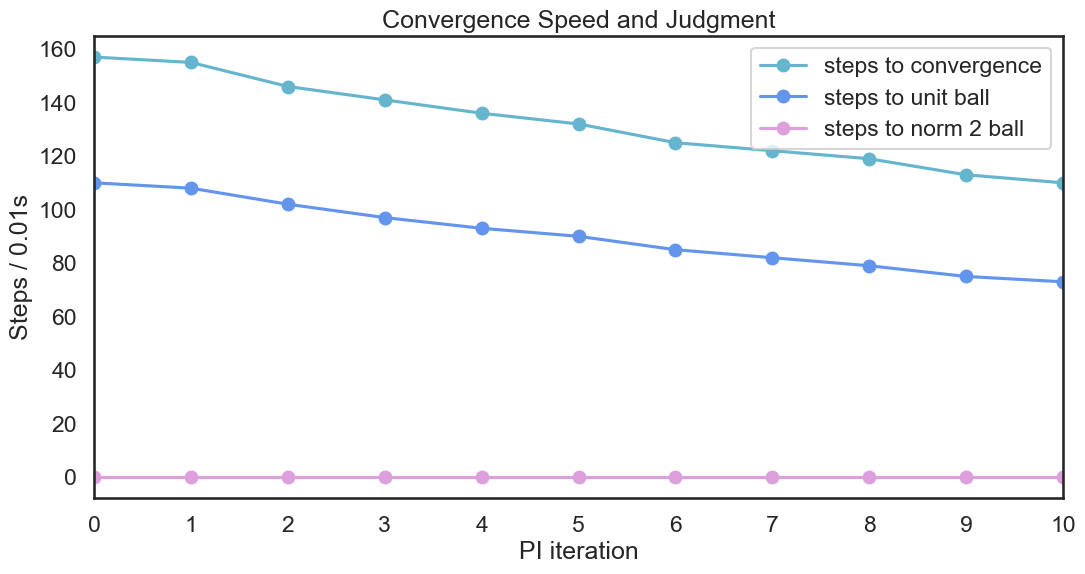

[157, 155, 146, 141, 136, 132, 125, 122, 119, 113, 110]
[110, 108, 102, 97, 93, 90, 85, 82, 79, 75, 73]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---------------------------------Iteration 11-------------------------------
------------------Sampling Training Data STCar------------------


sample state space:  12%|█▏        | 238/2000 [00:05<00:37, 46.66it/s]


KeyboardInterrupt: 

In [3]:
d1 = OffPolicyDlearningProcess(system = car1,
                               actor_bound=100.0,
                               n_hiddens_policy=32,
                               n_hiddens_lyapunov=64,
                               n_hiddens_dfunction=64,
                               tau = 0.2,
                               replay_buffer_capacity = 4000,
                               sample_num = 2000,
                               save_path = 'experiment_results/DOPT/')

delta_x = torch.tensor([[-1, -1]], dtype=torch.float32)

d1.off_policy_dlearning_main_iteration_4_stcar(iteration=20,
                                               delta_x = delta_x,
                                               plot_time_span = 5.0,)